# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [2]:
declare = True

res = []

for optimizer in ['cobyla', 'spsa', 'neldermead']:
    for preprocessing in ['pca', 'lda']:
        for init in ['uniform', 'normal', 'beta']:
            r = pd.read_csv("../reports/results/glass_identification___{}_{}_{}_results.csv".format(optimizer, preprocessing, init), index_col=0)
            r['initialization'] = init

            res.append(r)

res = pd.concat(res)
res.head()

accuracy        f1        time   
index                                   
0      0.488372  0.488421  426.369733  \
1      0.441860  0.412520  449.528344   
2      0.302326  0.258619  428.005836   
3      0.418605  0.395349  763.010007   
4      0.209302  0.225413  812.025835   

                                              ansatz   
index                                                  
0      <function get_efficientsu2 at 0x7f2b7826f9d0>  \
1      <function get_efficientsu2 at 0x7f2b7826f9d0>   
2      <function get_efficientsu2 at 0x7f2b7826f9d0>   
3      <function get_efficientsu2 at 0x7f2b7826f9d0>   
4      <function get_efficientsu2 at 0x7f2b7826f9d0>   

                                     optimizer   
index                                            
0      <function get_cobyla at 0x7f2b47c04040>  \
1      <function get_cobyla at 0x7f2b47c04040>   
2      <function get_cobyla at 0x7f2b47c04040>   
3      <function get_cobyla at 0x7f2b47c04040>   
4      <function get_cobyla at 0x7f2b47c04040>   

                                          featuremap entanglement   
index                                                               
0       <function get_zfeaturemap at 0x7f2b7ee4a1f0>         full  \
1       <function get_zfeaturemap at 0x7f2b7ee4a1f0>       linear   
2       <function get_zfeaturemap at 0x7f2b7ee4a1f0>     circular   
3       <function get_zfeaturemap at 0x7f2b7ee4a1f0>          sca   
4      <function get_zzfeaturemap at 0x7f2b7ee4a280>         full   

      entanglement_featuremap  iterations preprocessing initialization  
index                                                                   
0                         NaN         202           pca        uniform  
1                         NaN         247           pca        uniform  
2                         NaN         228           pca        uniform  
3                         NaN         405           pca        uniform  
4                        full         249           pca        uniform

In [3]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [4]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [5]:
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [6]:
# consider configurations that are within 10% of the best configuration (accuracy)
best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]

worst = res[res['accuracy'] < min(res['accuracy']) + 0.1]

index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

In [7]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

accuracy        f1        time           ansatz optimizer featuremap   
0  0.604651  0.571749  608.743997    efficient_su2    cobyla         zz  \
1  0.627907  0.561586  470.346298    efficient_su2    cobyla          z   
2  0.558140  0.546770  641.711052        two_local      spsa         zz   
3  0.581395  0.538715  302.349984    efficient_su2    cobyla          z   
4  0.534884  0.535480  663.465386  real_amplitudes      spsa         zz   

  entanglement entanglement_featuremap  iterations preprocessing   
0       linear                     sca         280           pca  \
1          sca                     NaN         349           lda   
2       linear                circular         351           pca   
3     circular                     NaN         223           lda   
4          sca                circular         351           pca   

  initialization  
0           beta  
1           beta  
2           beta  
3           beta  
4           beta

In [8]:
res.tail()

accuracy        f1         time           ansatz    optimizer   
1507  0.023256  0.007156  1415.763762    efficient_su2  nelder_mead  \
1508  0.023256  0.007156  1088.801629  real_amplitudes  nelder_mead   
1509  0.046512  0.004430  1083.555656  real_amplitudes  nelder_mead   
1510  0.023256  0.002448  1346.620365    efficient_su2  nelder_mead   
1511  0.023256  0.002215  1835.877368    efficient_su2  nelder_mead   

     featuremap entanglement entanglement_featuremap  iterations   
1507         zz         full                pairwise         847  \
1508          z         full                     NaN         903   
1509          z       linear                     NaN         982   
1510          z          sca                     NaN        1000   
1511          z          sca                     NaN        1000   

     preprocessing initialization  
1507           lda           beta  
1508           lda           beta  
1509           lda           beta  
1510           lda           beta  
1511           pca           beta

In [9]:
res.groupby(['optimizer', 'initialization'])[['iterations']].mean()

iterations
optimizer   initialization            
cobyla      beta            162.827381
            normal          139.803571
            uniform         137.357143
nelder_mead beta            974.982143
            normal          983.392857
            uniform         985.440476
spsa        beta            351.000000
            normal          351.000000
            uniform         351.000000

## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* The three optimizers perform significantly different
* COBYLA significantly better than SPSA
* But both SPSA and Cobyla are significantly better than Nelder-Mead

In [10]:
res.groupby(['optimizer']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                 mean       std      mean       std
optimizer                                          
cobyla       0.279347  0.106778  0.276130  0.095021
nelder_mead  0.209487  0.075289  0.217297  0.074287
spsa         0.294850  0.117817  0.291681  0.102842

In [11]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [12]:
# Friedman test
print("Friedman: significantly different: ", friedmanchisquare(c['accuracy'], n['accuracy'], s['accuracy']).pvalue < 0.05)
# Wilcoxon
print("Wilcoxon: Cobyla significantly worse than SPSA:", wilcoxon(c['accuracy'], s['accuracy'], alternative='less').pvalue < 0.05)
print("Wilcoxon: Cobyla significantly better than Nelder-Mead:", wilcoxon(c['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA significantly better than Nelder-Mead:", wilcoxon(s['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)

Friedman: significantly different:  True
Wilcoxon: Cobyla significantly worse than SPSA: True
Wilcoxon: Cobyla significantly better than Nelder-Mead: True
Wilcoxon: SPSA significantly better than Nelder-Mead: True


In [13]:
best_configs.value_counts(['optimizer'])

optimizer
spsa         13
cobyla        5
Name: count, dtype: int64

## Ansatz
We now consider the ansatz parameter alone.
* Pauli Two Design: although quite descent performance in mean, it is usually neither the worst, nor the best, which is quite interesting
* The ansatzes do not perform significantly different
* Anaylzing the top configurations shows that pauli two design does not perform that well, but there does not seem a clear tendency towards any other ansatz

In [14]:
# get first row and first row where ansatz =='pauli'
pd.concat([res.iloc[0:2, :].T, res[res['ansatz'] == 'pauli_two_design'].iloc[0]], axis=1).T

accuracy        f1        time            ansatz optimizer featuremap   
0   0.604651  0.571749  608.743997     efficient_su2    cobyla         zz  \
1   0.627907  0.561586  470.346298     efficient_su2    cobyla          z   
41  0.511628  0.464878  672.894053  pauli_two_design      spsa         zz   

   entanglement entanglement_featuremap iterations preprocessing   
0        linear                     sca        280           pca  \
1           sca                     NaN        349           lda   
41          NaN                circular        351           pca   

   initialization  
0            beta  
1            beta  
41           beta

In [15]:
res.groupby(['ansatz']).agg({"accuracy":[np.mean, np.std, np.min, np.max], "f1":[np.mean, np.std]})

accuracy                                      f1          
                      mean       std      amin      amax      mean       std
ansatz                                                                      
efficient_su2     0.262651  0.113498  0.023256  0.627907  0.262765  0.100566
pauli_two_design  0.245047  0.105328  0.069767  0.511628  0.248238  0.094982
real_amplitudes   0.261789  0.104799  0.023256  0.534884  0.262671  0.095443
two_local         0.262877  0.106812  0.023256  0.558140  0.262772  0.095516

In [16]:
e = res[res['ansatz'] == 'efficient_su2']['accuracy']
p = res[res['ansatz'] == 'pauli_two_design']['accuracy']
r = res[res['ansatz'] == 'real_amplitudes']['accuracy']
t = res[res['ansatz'] == 'two_local']['accuracy']

In [17]:
# kruskal test as they are not paired
print("Ansatzes significantly different: ", kruskal(e, p, r, t).pvalue < 0.05)

Ansatzes significantly different:  False


In [18]:
best_configs.value_counts(['ansatz'], dropna=False).sort_index()

ansatz         
efficient_su2      6
real_amplitudes    7
two_local          5
Name: count, dtype: int64

## Ansatz Entanglement
* Not too big of a difference in mean --> somewhat sca seems to perform a lot better
* Significance test shows no significant difference

In [19]:
res.groupby(['entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1                    
                  mean    median       std      mean    median       std
entanglement                                                            
circular      0.256962  0.232558  0.105816  0.255812  0.244410  0.093314
full          0.268877  0.255814  0.096745  0.268614  0.260139  0.088638
linear        0.274620  0.255814  0.114371  0.273039  0.263730  0.101621
pairwise      0.266796  0.232558  0.114614  0.270953  0.249957  0.100910
sca           0.247990  0.209302  0.111616  0.250751  0.236782  0.101265

In [20]:
c = res[res['entanglement'] == 'circular']['accuracy']
f = res[res['entanglement'] == 'full']['accuracy']
l = res[res['entanglement'] == 'linear']['accuracy']
p = res[res['entanglement'] == 'pairwise']['accuracy']
s = res[res['entanglement'] == 'sca']['accuracy']

In [21]:
# kruskal test as not paired
print("Entanglement significantly different:", kruskal(c,f,l,p,s).pvalue < 0.05)

for i, name in zip([c,f,l,p,s], ['circular','full','linear','pairwise','sca']):
    for j, name2 in zip([c,f,l,p,s], ['circular','full','linear','pairwise','sca']):
        if name != name2:
            if mannwhitneyu(i, j, alternative='greater').pvalue < 0.05:
                print(f"{name} significantly better than {name2}:", mannwhitneyu(i, j, alternative='greater').pvalue < 0.05)

Entanglement significantly different: True
full significantly better than circular: True
full significantly better than sca: True
linear significantly better than circular: True
linear significantly better than sca: True


In [22]:
best_configs.value_counts(['entanglement'], dropna=False).sort_index()

entanglement
circular        2
full            1
linear          8
pairwise        2
sca             5
Name: count, dtype: int64

## Ansatz combined with ansatz entanglement
* In mean, does not show too much.
* Significance test shows that there are no significant differences in entanglement for any ansatz

In [23]:
res.groupby(['ansatz', 'entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1   
                                  mean    median       std      mean   
ansatz          entanglement                                           
efficient_su2   circular      0.251077  0.209302  0.116290  0.249325  \
                full          0.254091  0.232558  0.097879  0.257562   
                linear        0.289190  0.255814  0.122245  0.285648   
                sca           0.256245  0.232558  0.113484  0.258524   
real_amplitudes circular      0.264858  0.255814  0.094684  0.265639   
                full          0.276916  0.255814  0.100420  0.274976   
                linear        0.265719  0.255814  0.106889  0.266342   
                sca           0.239664  0.209302  0.114083  0.243726   
two_local       circular      0.254953  0.244186  0.105878  0.252471   
                full          0.275624  0.255814  0.090869  0.273304   
                linear        0.268949  0.255814  0.113096  0.267128   
                pairwise      0.266796  0.232558  0.114614  0.270953   
                sca           0.248062  0.209302  0.107586  0.250002   

                                                  
                                median       std  
ansatz          entanglement                      
efficient_su2   circular      0.224715  0.099210  
                full          0.245243  0.091378  
                linear        0.270541  0.107767  
                sca           0.243556  0.100870  
real_amplitudes circular      0.260374  0.084579  
                full          0.268784  0.095096  
                linear        0.261012  0.096135  
                sca           0.233776  0.103522  
two_local       circular      0.238671  0.095592  
                full          0.270257  0.078343  
                linear        0.261837  0.100385  
                pairwise      0.249957  0.100910  
                sca           0.228400  0.099761

In [24]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index).sort_index()['accuracy']
    e_f = e[e['entanglement'] == 'full'].set_index(index).sort_index()['accuracy']
    e_l = e[e['entanglement'] == 'linear'].set_index(index).sort_index()['accuracy']
    e_s = e[e['entanglement'] == 'sca'].set_index(index).sort_index()['accuracy']

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()['accuracy']
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s, e_p).pvalue < 0.05)
    else:
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s).pvalue < 0.05)

efficient_su2 significantly different entanglement: True
real_amplitudes significantly different entanglement: True
two_local significantly different entanglement: False


In [25]:
best_configs.value_counts(['ansatz', 'entanglement'], dropna=False).sort_index()

ansatz           entanglement
efficient_su2    circular        1
                 linear          3
                 sca             2
real_amplitudes  circular        1
                 full            1
                 linear          2
                 sca             3
two_local        linear          3
                 pairwise        2
Name: count, dtype: int64

## Feature Map
* No significant differences
* But, ZZFeatureMap performs a lot (!) better with beta initialization than with uniform

In [26]:
res.head(26).groupby(['featuremap'])['accuracy'].count()

featuremap
z      9
zz    17
Name: accuracy, dtype: int64

In [27]:
res.groupby(['featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1                    
                mean    median       std      mean    median       std
featuremap                                                            
z           0.328904  0.348837  0.116129  0.299873  0.309372  0.109765
zz          0.247693  0.232558  0.101156  0.254069  0.240856  0.092293

In [28]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1             
                               mean    median       std      mean    median   
featuremap initialization                                                     
z          beta            0.343577  0.348837  0.141499  0.272889  0.253062  \
           normal          0.317553  0.348837  0.108930  0.310397  0.330607   
           uniform         0.325581  0.325581  0.092391  0.316333  0.319378   
zz         beta            0.329734  0.348837  0.115971  0.318418  0.322159   
           normal          0.209801  0.209302  0.060062  0.225243  0.223215   
           uniform         0.203544  0.209302  0.059581  0.218545  0.218687   

                                     
                                std  
featuremap initialization            
z          beta            0.131422  
           normal          0.101516  
           uniform         0.087949  
zz         beta            0.107968  
           normal          0.062469  
           uniform         0.061537

In [29]:
z = res[res['featuremap'] == 'z']['accuracy']
zz = res[res['featuremap'] == 'zz']['accuracy']

In [30]:
print("Z significantly better than ZZFeatureMap:", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

Z significantly better than ZZFeatureMap: True


In [31]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()

featuremap
z              7
zz            11
Name: count, dtype: int64

## Feature Entanglement
* No significant differences
* Full is a lot less represented among the best-performing configurations though

In [32]:
res.groupby(['entanglement_featuremap'], dropna=False).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1             
                             mean    median       std      mean    median   
entanglement_featuremap                                                     
circular                 0.249169  0.232558  0.106556  0.257200  0.249821  \
full                     0.239849  0.209302  0.083221  0.249144  0.235450   
linear                   0.254522  0.232558  0.101074  0.258749  0.245586   
pairwise                 0.249446  0.232558  0.106320  0.253317  0.238842   
sca                      0.245478  0.232558  0.106806  0.251934  0.238957   
NaN                      0.328904  0.348837  0.116129  0.299873  0.309372   

                                   
                              std  
entanglement_featuremap            
circular                 0.097352  
full                     0.079637  
linear                   0.090494  
pairwise                 0.095462  
sca                      0.097689  
NaN                      0.109765

In [33]:
c = res[res['entanglement_featuremap'] == 'circular']['accuracy']
f = res[res['entanglement_featuremap'] == 'full']['accuracy']
l = res[res['entanglement_featuremap'] == 'linear']['accuracy']
p = res[res['entanglement_featuremap'] == 'pairwise']['accuracy']
s = res[res['entanglement_featuremap'] == 'sca']['accuracy']

print('Entanglement significantly different:', kruskal(c,f,l,p,s).pvalue < 0.05)

Entanglement significantly different: False


In [34]:
best_configs.value_counts(['entanglement_featuremap'], dropna=False).sort_index()

entanglement_featuremap
circular                   3
linear                     2
pairwise                   2
sca                        4
NaN                        7
Name: count, dtype: int64

## Ansatz and feature map
* No significant differences

In [35]:
res.groupby(['ansatz', 'featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1             
                                 mean    median       std      mean    median   
ansatz           featuremap                                                     
efficient_su2    z           0.337855  0.348837  0.118452  0.308111  0.312265  \
                 zz          0.247610  0.209302  0.106439  0.253696  0.234451   
pauli_two_design z           0.339793  0.395349  0.121271  0.323595  0.351032   
                 zz          0.226098  0.209302  0.091377  0.233167  0.215541   
real_amplitudes  z           0.316537  0.325581  0.118038  0.289445  0.302257   
                 zz          0.250840  0.232558  0.098533  0.257316  0.250411   
two_local        z           0.329457  0.348837  0.112710  0.296880  0.308822   
                 zz          0.249561  0.232558  0.100555  0.255950  0.245457   

                                       
                                  std  
ansatz           featuremap            
efficient_su2    z           0.109955  
                 zz          0.096207  
pauli_two_design z           0.110061  
                 zz          0.084582  
real_amplitudes  z           0.116353  
                 zz          0.089925  
two_local        z           0.104665  
                 zz          0.092200

In [36]:
for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index).sort_index()['accuracy']
    zz = f[f['featuremap'] == 'zz'].set_index(index).sort_index()['accuracy']

    print(f"{ansatz}: Z and ZZ significantly different", mannwhitneyu(z, zz).pvalue < 0.05)

efficient_su2: Z and ZZ significantly different True
pauli_two_design: Z and ZZ significantly different True
real_amplitudes: Z and ZZ significantly different True
two_local: Z and ZZ significantly different True


In [37]:
best_configs.value_counts(['ansatz', 'featuremap'], dropna=False).sort_index()

ansatz           featuremap
efficient_su2    z             4
                 zz            2
real_amplitudes  z             2
                 zz            5
two_local        z             1
                 zz            4
Name: count, dtype: int64

## Preprocessing
* PCA significantly better than LDA

In [38]:
res.groupby(['preprocessing']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                   mean       std      mean       std
preprocessing                                        
lda            0.267196  0.108477  0.264914  0.097281
pca            0.255260  0.107437  0.258492  0.096483

In [39]:
p = res[res['preprocessing']=='pca'].set_index(index).sort_index()['accuracy']
l = res[res['preprocessing']=='lda'].set_index(index).sort_index()['accuracy']

In [40]:
print("PCA significantly worse than LDA: ", wilcoxon(p,l, alternative='less').pvalue < 0.05)

PCA significantly worse than LDA:  True


In [41]:
best_configs.value_counts(['preprocessing'], dropna=False)

preprocessing
lda              10
pca               8
Name: count, dtype: int64

## Initialization
* Beta works better in mean but also has higher std
* Beta init really improves lda results
* Beta also really improves SPSA and COBYLA results, not too much for Nelder-Mead

In [42]:
res.groupby(['initialization'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                    mean       std      mean       std
initialization                                        
beta            0.332041  0.120556  0.310830  0.113353
normal          0.227759  0.081109  0.239435  0.077203
uniform         0.223883  0.080239  0.234843  0.075905

In [43]:
b = res[res['initialization']=='beta'].set_index(index).sort_index()['accuracy']
r = res[res['initialization']=='uniform'].set_index(index).sort_index()['accuracy']
n = res[res['initialization']=='normal'].set_index(index).sort_index()['accuracy']

In [44]:
print("Significant Differences:", friedmanchisquare(b,r,n).pvalue < 0.05)
print("Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
print("Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
print("Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

Significant Differences: True
Beta significantly better than Uniform: True
Beta significantly better than Normal: True
Normal and Uniform significantly different: False


In [45]:
best_configs.value_counts(['initialization'], dropna=False)

initialization
beta              18
Name: count, dtype: int64

### Intialization X Optimizer
Significant differences for COBYLA and SPSA, but not for Nelder-Mead.

In [46]:
res.groupby(['optimizer', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
optimizer   initialization                                        
cobyla      beta            0.371955  0.083346  0.342915  0.087979
            normal          0.238372  0.088005  0.248298  0.082466
            uniform         0.227713  0.081554  0.237177  0.076560
nelder_mead beta            0.211794  0.091374  0.204542  0.086120
            normal          0.209718  0.066340  0.226086  0.067924
            uniform         0.206949  0.065661  0.221261  0.065834
spsa        beta            0.412375  0.076413  0.385033  0.074862
            normal          0.235188  0.084693  0.243920  0.079116
            uniform         0.236988  0.089182  0.246091  0.082703

In [47]:
for optimizer in pd.unique(res['optimizer']):
    res_opt = res[res['optimizer'] == optimizer]
    n = res_opt[res_opt['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_opt[res_opt['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_opt[res_opt['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{optimizer}: Significant Differences:", sign)
    if sign:
        print(f"{optimizer}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)


cobyla: Significant Differences: True
cobyla: Beta significantly better than Uniform: True
cobyla: Beta significantly better than Normal: True
cobyla: Normal and Uniform significantly different: False
spsa: Significant Differences: True
spsa: Beta significantly better than Uniform: True
spsa: Beta significantly better than Normal: True
spsa: Normal and Uniform significantly different: False
nelder_mead: Significant Differences: False


### Initialization X Ansatz
Significant differences for all ansatzes. Beta outperforms both others on all ansatzes, no significant differences between normal and uniform otherwise.

In [48]:
res.groupby(['ansatz', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                     mean       std      mean       std
ansatz           initialization                                        
efficient_su2    beta            0.344315  0.127118  0.321876  0.119358
                 normal          0.222707  0.076840  0.234748  0.069577
                 uniform         0.220930  0.081772  0.231671  0.078179
pauli_two_design beta            0.288760  0.134732  0.274343  0.118909
                 normal          0.227390  0.070781  0.239494  0.073407
                 uniform         0.218992  0.088140  0.230877  0.083442
real_amplitudes  beta            0.328650  0.116271  0.307390  0.111987
                 normal          0.227875  0.082855  0.239589  0.079896
                 uniform         0.228844  0.077237  0.241033  0.074227
two_local        beta            0.333592  0.114335  0.312043  0.107539
                 normal          0.231783  0.085258  0.243049  0.081837
                 uniform         0.223256  0.080207  0.233222  0.074161

In [49]:
for ansatz in pd.unique(res['ansatz']):
    res_ans = res[res['ansatz'] == ansatz]
    n = res_ans[res_ans['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ans[res_ans['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ans[res_ans['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ansatz}: Significant Differences:", sign)
    if sign:
        print(f"{ansatz}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

efficient_su2: Significant Differences: True
efficient_su2: Beta significantly better than Uniform: True
efficient_su2: Beta significantly better than Normal: True
efficient_su2: Normal and Uniform significantly different: False
two_local: Significant Differences: True
two_local: Beta significantly better than Uniform: True
two_local: Beta significantly better than Normal: True
two_local: Normal and Uniform significantly different: False
real_amplitudes: Significant Differences: True
real_amplitudes: Beta significantly better than Uniform: True
real_amplitudes: Beta significantly better than Normal: True
real_amplitudes: Normal and Uniform significantly different: False
pauli_two_design: Significant Differences: False


### Initialization X Ansatz Entanglement
Significant differences for all entanglement strategies. Beta outperforms bot hohters on all strategies significantly, no difference between uniform and normal for any strategy.

In [50]:
res.groupby(['entanglement', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                 mean       std      mean       std
entanglement initialization                                        
circular     beta            0.339147  0.106269  0.313313  0.101025
             normal          0.225668  0.078929  0.236971  0.074807
             uniform         0.206072  0.076536  0.217150  0.072655
full         beta            0.317183  0.107796  0.294818  0.104731
             normal          0.243540  0.081214  0.255594  0.076627
             uniform         0.245909  0.080636  0.255430  0.076403
linear       beta            0.353575  0.127010  0.328764  0.120363
             normal          0.235357  0.086006  0.243644  0.079309
             uniform         0.234927  0.080745  0.246710  0.075434
pairwise     beta            0.331395  0.145962  0.319115  0.132347
             normal          0.245478  0.080262  0.261108  0.073778
             uniform         0.223514  0.075670  0.232635  0.064622
sca          beta            0.332903  0.122467  0.315825  0.115325
             normal          0.200689  0.076148  0.214286  0.075060
             uniform         0.210379  0.076465  0.222141  0.074693

In [51]:
for entanglement in pd.unique(res['entanglement']):
    if entanglement is np.nan:
        continue
    res_ent = res[res['entanglement'] == entanglement]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{entanglement}: Significant Differences:", sign)
    if sign:
        print(f"{entanglement}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: True
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X FeatureMap
Only significant differences for ZZFeatureMap. No significant differences for normal and uniform but beta outperforms both others for ZZFeatureMap.

In [52]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                               mean       std      mean       std
featuremap initialization                                        
z          beta            0.343577  0.141499  0.272889  0.131422
           normal          0.317553  0.108930  0.310397  0.101516
           uniform         0.325581  0.092391  0.316333  0.087949
zz         beta            0.329734  0.115971  0.318418  0.107968
           normal          0.209801  0.060062  0.225243  0.062469
           uniform         0.203544  0.059581  0.218545  0.061537

In [53]:
for featmap in pd.unique(res['featuremap']):
    res_fm = res[res['featuremap'] == featmap]
    n = res_fm[res_fm['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_fm[res_fm['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_fm[res_fm['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{featmap}: Significant Differences:", sign)
    if sign:
        print(f"{featmap}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

zz: Significant Differences: True
zz: Beta significantly better than Uniform: True
zz: Beta significantly better than Normal: True
zz: Normal and Uniform significantly different: False
z: Significant Differences: True
z: Beta significantly better than Uniform: False
z: Beta significantly better than Normal: True
z: Normal and Uniform significantly different: False


### Initialization X FeatureMap Entanglement
Beta outperforms all others on all entanglement strategies. No significant differences between normal and uniform on any other task.

In [54]:
res.groupby(['entanglement_featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
entanglement_featuremap initialization                                        
circular                beta            0.346622  0.111363  0.338113  0.102846
                        normal          0.208472  0.064925  0.227038  0.065573
                        uniform         0.192414  0.056315  0.206448  0.060253
full                    beta            0.294574  0.097693  0.294905  0.093545
                        normal          0.212901  0.055044  0.228105  0.057300
                        uniform         0.212071  0.061836  0.224421  0.062923
linear                  beta            0.330842  0.119368  0.313772  0.111160
                        normal          0.222038  0.057693  0.235573  0.059489
                        uniform         0.210687  0.066404  0.226902  0.065079
pairwise                beta            0.330565  0.131707  0.313555  0.121096
                        normal          0.203212  0.062851  0.216690  0.065086
                        uniform         0.214563  0.053222  0.229705  0.055353
sca                     beta            0.346069  0.111992  0.331746  0.106401
                        normal          0.202381  0.058520  0.218806  0.064078
                        uniform         0.187984  0.055365  0.205250  0.060571

In [55]:
for ent in pd.unique(res['entanglement_featuremap']):
    if ent is np.nan:
        continue
    res_ent = res[res['entanglement_featuremap'] == ent]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ent}: Significant Differences:", sign)
    if sign:
        print(f"{ent}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: True
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: True
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False


### Initialization X Preprocessing
Significant differences for both preprocessing techniques. Beta outperforms both others for both methods, no significant differences between the others.

In [56]:
res.groupby(['preprocessing', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                  mean       std      mean       std
preprocessing initialization                                        
lda           beta            0.339609  0.125041  0.318086  0.117312
              normal          0.233020  0.075947  0.241156  0.071270
              uniform         0.228959  0.078019  0.235501  0.073151
pca           beta            0.324474  0.115651  0.303575  0.109001
              normal          0.222499  0.085792  0.237714  0.082819
              uniform         0.218808  0.082240  0.234186  0.078703

In [57]:
for preprocessing in pd.unique(res['preprocessing']):
    res_pre = res[res['preprocessing'] == preprocessing]
    n = res_pre[res_pre['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_pre[res_pre['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_pre[res_pre['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{preprocessing}: Significant Differences:", sign)
    if sign:
        print(f"{preprocessing}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

pca: Significant Differences: True
pca: Beta significantly better than Uniform: True
pca: Beta significantly better than Normal: True
pca: Normal and Uniform significantly different: False
lda: Significant Differences: True
lda: Beta significantly better than Uniform: True
lda: Beta significantly better than Normal: True
lda: Normal and Uniform significantly different: False


## Plot the Results

In [58]:
res_better = res

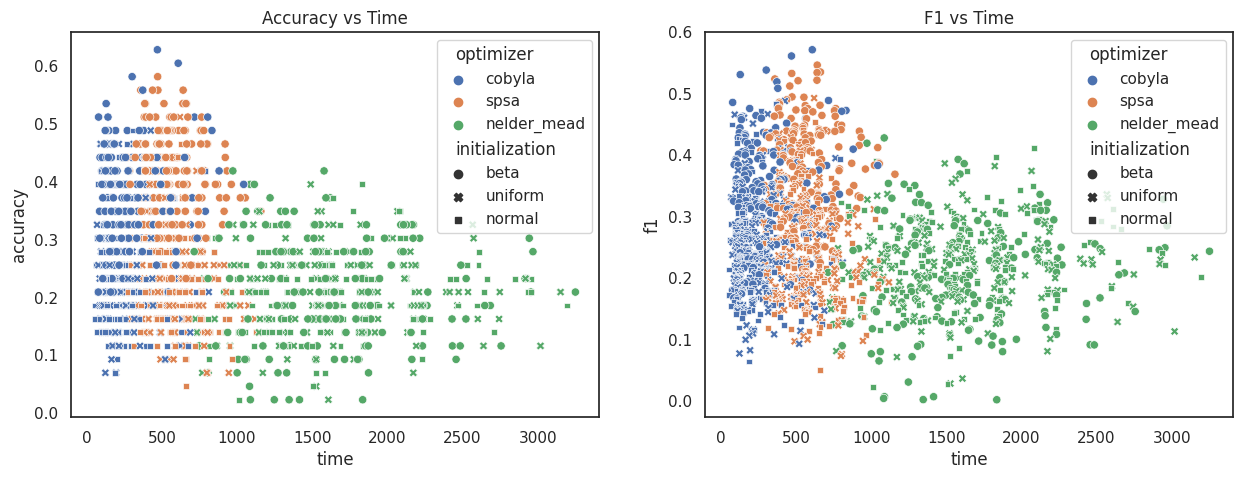

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='optimizer', style='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='optimizer', style='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [60]:
cob_runtime = res[res['optimizer']=='cobyla'].set_index(index).sort_index()['time']
spsa_runtime = res[res['optimizer']=='spsa'].set_index(index).sort_index()['time']
nelder_runtime = res[res['optimizer']=='nelder_mead'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(cob_runtime, spsa_runtime, nelder_runtime).pvalue < 0.05)

print("COBYLA significantly shorter than SPSA", wilcoxon(cob_runtime, spsa_runtime, alternative='less').pvalue < 0.05)
print("COBYLA significantly shorter than Nelder-Mead", wilcoxon(cob_runtime, nelder_runtime, alternative='less').pvalue < 0.05)
print("SPSA significantly shorter than Nelder-Mead", wilcoxon(spsa_runtime, nelder_runtime, alternative='less').pvalue < 0.05)

Significant Differences: True
COBYLA significantly shorter than SPSA True
COBYLA significantly shorter than Nelder-Mead True
SPSA significantly shorter than Nelder-Mead True


### Ansatz

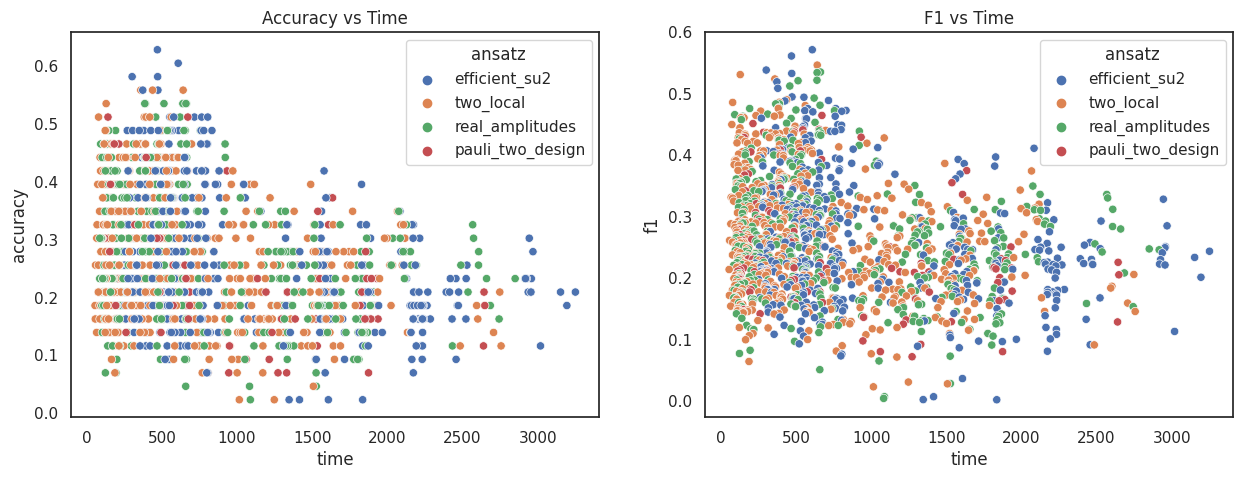

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='ansatz', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='ansatz', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [62]:
eff_runtime = res[res['ansatz']=='efficient_su2']['time']
pauli_runtime = res[res['ansatz']=='pauli_two_design']['time']
real_runtime = res[res['ansatz']=='real_amplitudes']['time']
two_runtime = res[res['ansatz']=='two_local']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(eff_runtime, pauli_runtime, real_runtime, two_runtime).pvalue < 0.05)

for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    for ansatz2 in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
        if ansatz != ansatz2:
            sign = mannwhitneyu(res[res['ansatz']==ansatz]['time'], res[res['ansatz']==ansatz2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{ansatz}: significantly shorter than {ansatz2}", sign)

Significant Differences: True
pauli_two_design: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than efficient_su2 True
two_local: significantly shorter than efficient_su2 True
two_local: significantly shorter than pauli_two_design True
two_local: significantly shorter than real_amplitudes True


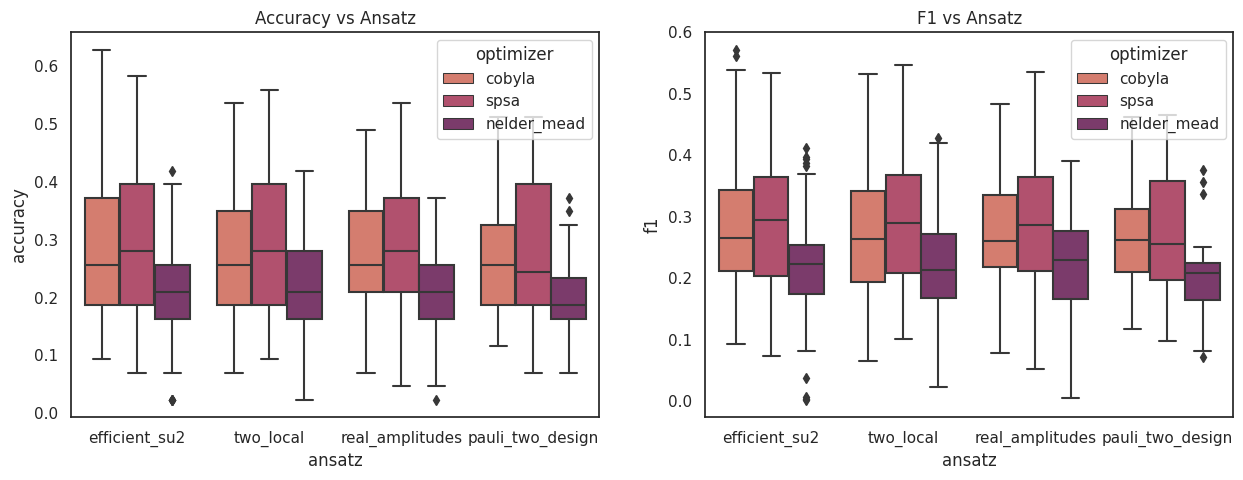

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

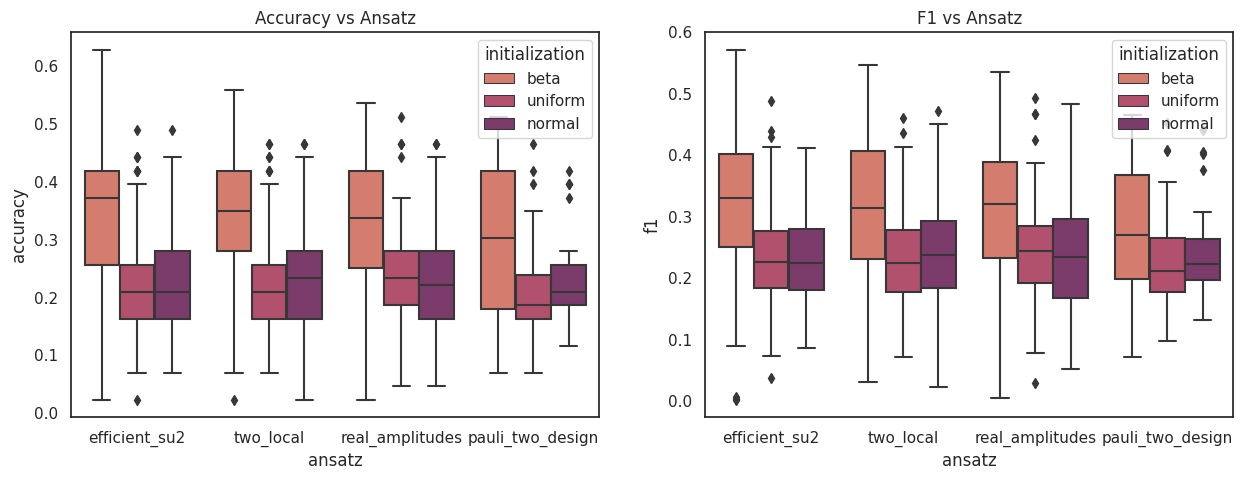

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

### FeatureMap

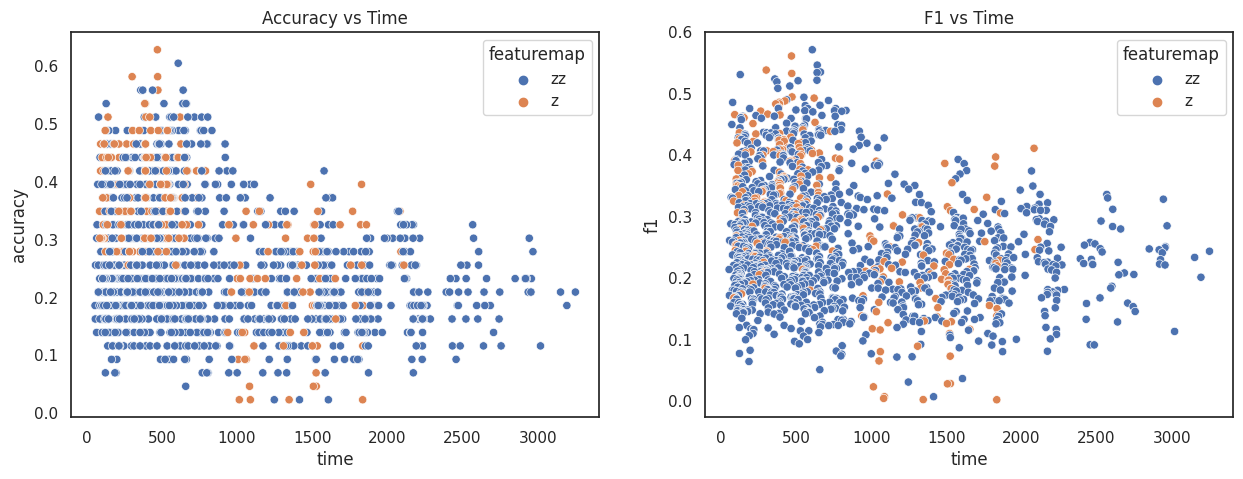

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [66]:
z_runtime = res[res['featuremap']=='z']['time']
zz_runtime = res[res['featuremap']=='zz']['time']

# significant differences in runtime
print("Z significantly shorter than ZZFeatureMap:", mannwhitneyu(z_runtime, zz_runtime, alternative='less').pvalue < 0.05)

Z significantly shorter than ZZFeatureMap: True


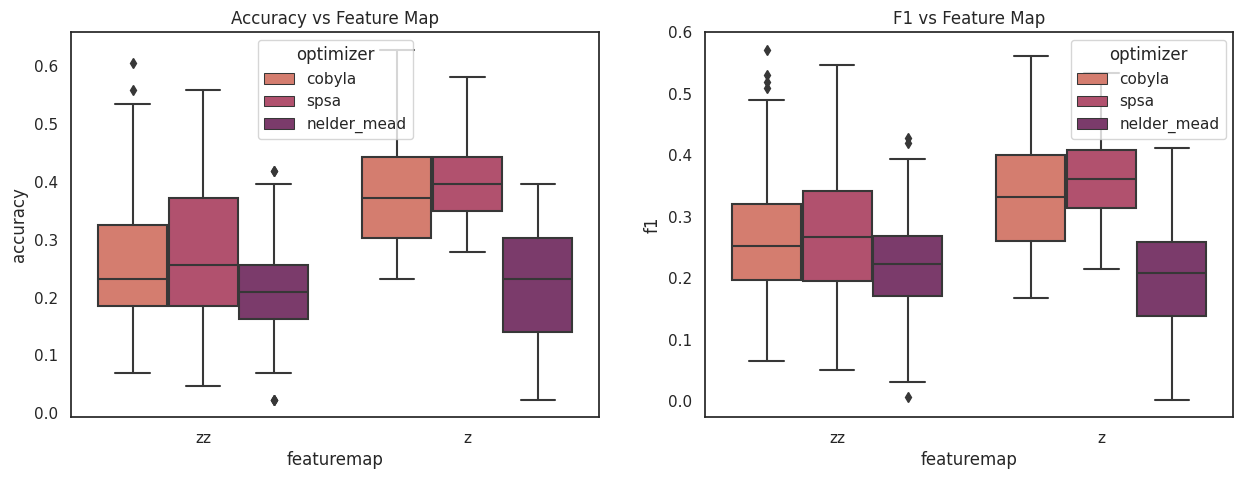

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

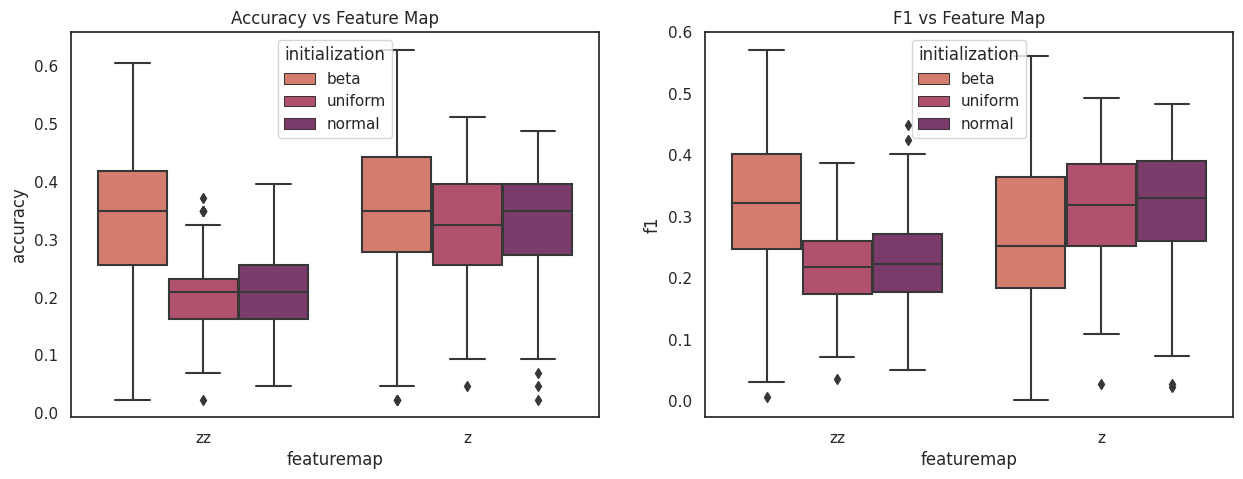

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

### Ansatz Entanglement

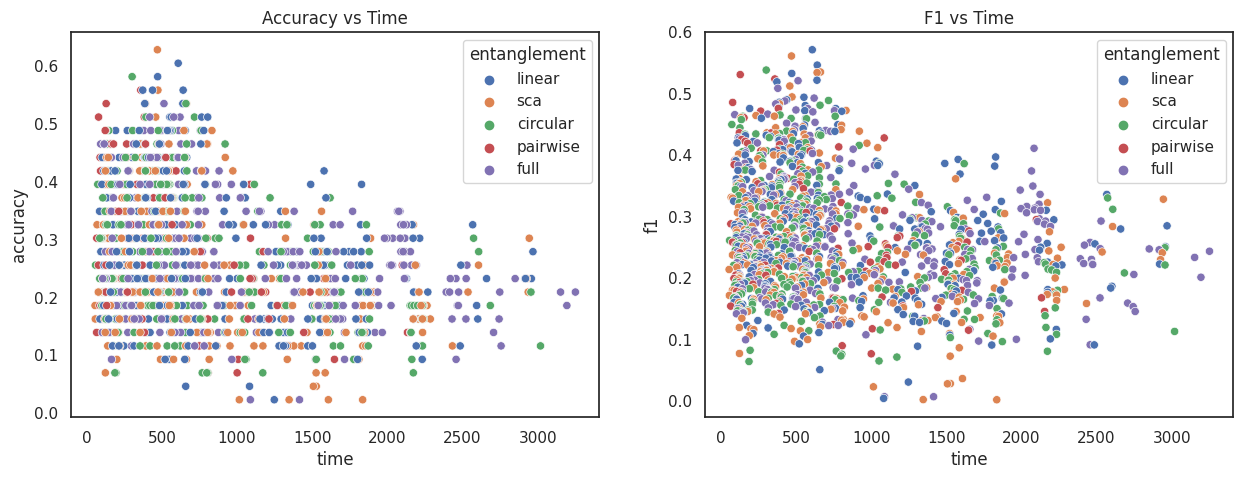

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [70]:
sca_runtime = res[res['entanglement']=='sca']['time']
full_runtime = res[res['entanglement']=='full']['time']
circular_runtime = res[res['entanglement']=='circular']['time']
linear_runtime = res[res['entanglement']=='linear']['time']
pairwise_runtime = res[res['entanglement']=='pairwise']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = mannwhitneyu(res[res['entanglement']==entanglement1]['time'], res[res['entanglement']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than sca True
pairwise: significantly shorter than full True
pairwise: significantly shorter than circular True
pairwise: significantly shorter than linear True


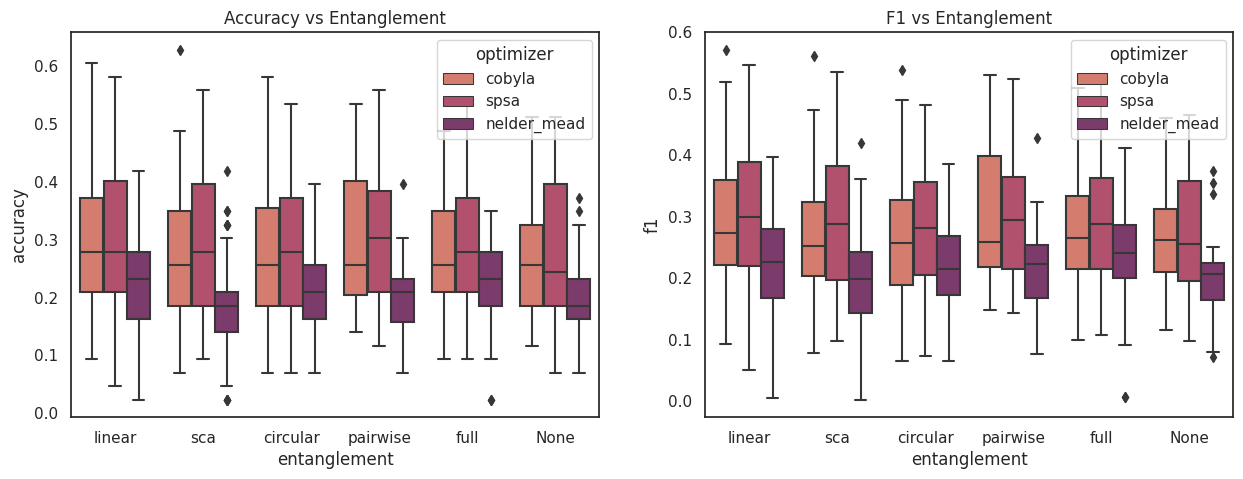

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

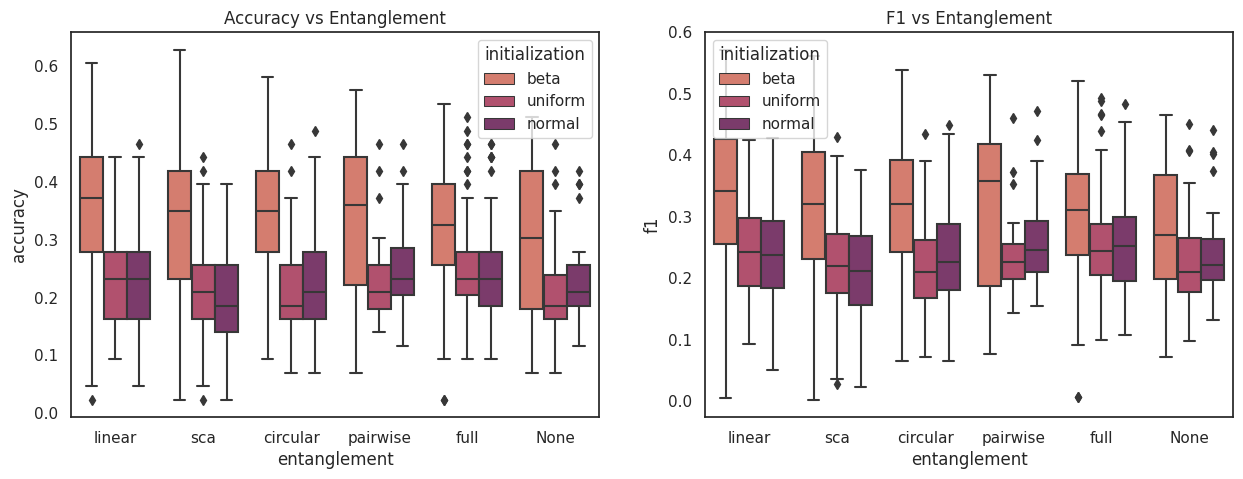

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

### FeatureMap Entanglement

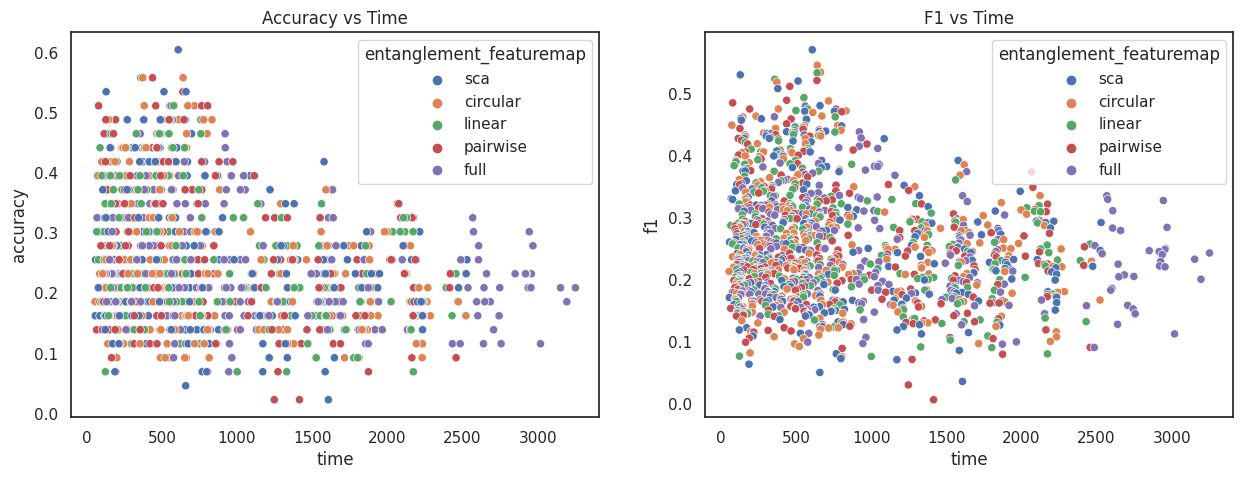

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement_featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement_featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [74]:
sca_runtime = res[res['entanglement_featuremap']=='sca'].set_index(index).sort_index()['time']
full_runtime = res[res['entanglement_featuremap']=='full'].set_index(index).sort_index()['time']
circular_runtime = res[res['entanglement_featuremap']=='circular'].set_index(index).sort_index()['time']
linear_runtime = res[res['entanglement_featuremap']=='linear'].set_index(index).sort_index()['time']
pairwise_runtime = res[res['entanglement_featuremap']=='pairwise'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = wilcoxon(res[res['entanglement_featuremap']==entanglement1]['time'], res[res['entanglement_featuremap']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than full True


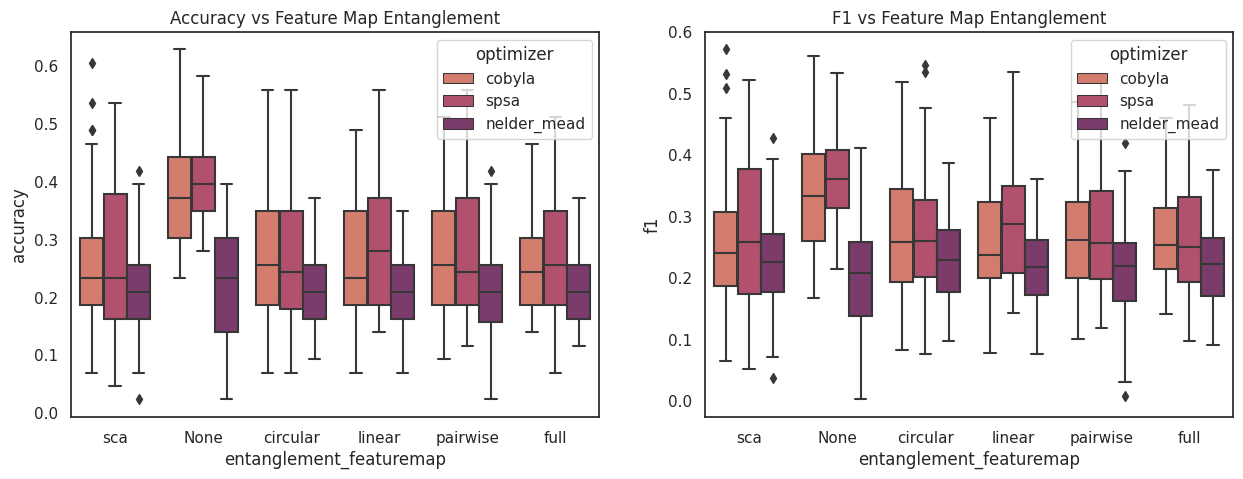

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


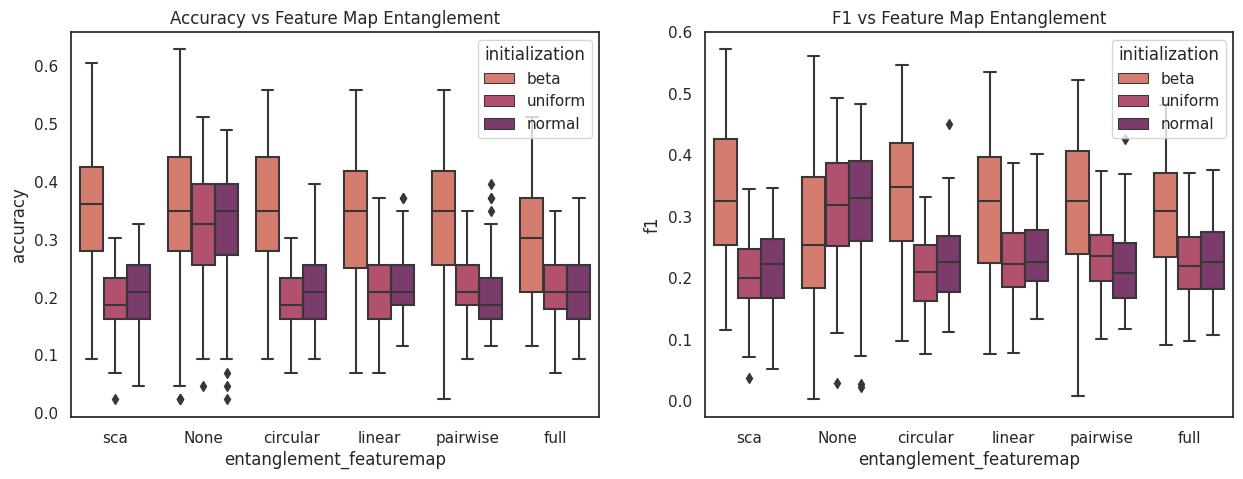

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


### Preprocessing

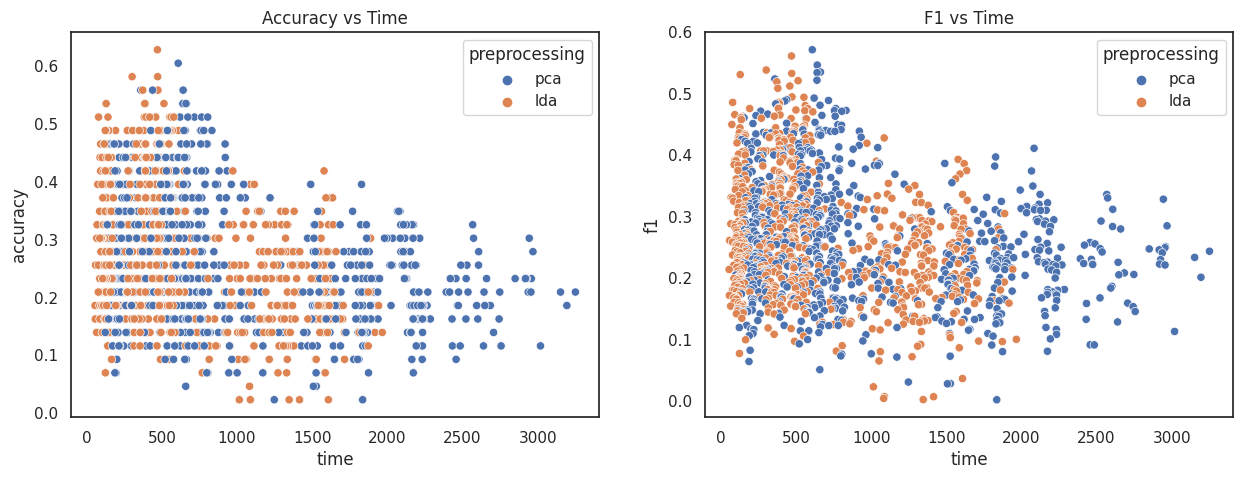

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='preprocessing', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='preprocessing', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [78]:
pca_runtime = res[res['preprocessing']=='pca'].set_index(index).sort_index()['time']
lda_runtime = res[res['preprocessing']=='lda'].set_index(index).sort_index()['time']

# significant differences in runtime
print("PCA significantly longer than LDA:", wilcoxon(pca_runtime, lda_runtime, alternative='greater').pvalue < 0.05)

PCA significantly longer than LDA: True


In [79]:
res.groupby(['preprocessing', 'optimizer'])[['iterations']].mean()

iterations
preprocessing optimizer              
lda           cobyla       130.027778
              nelder_mead  970.226190
              spsa         351.000000
pca           cobyla       163.297619
              nelder_mead  992.317460
              spsa         351.000000

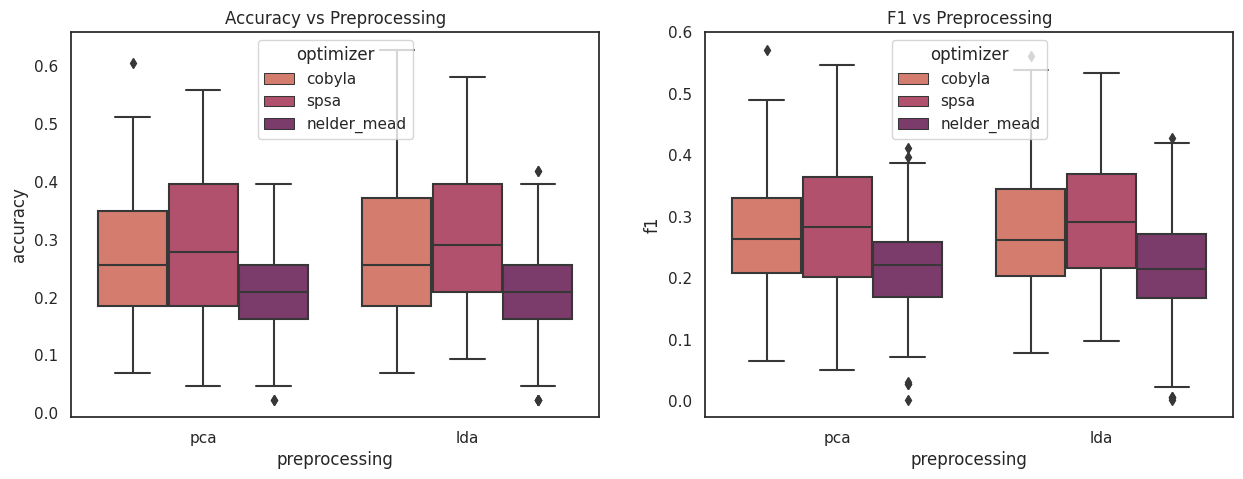

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

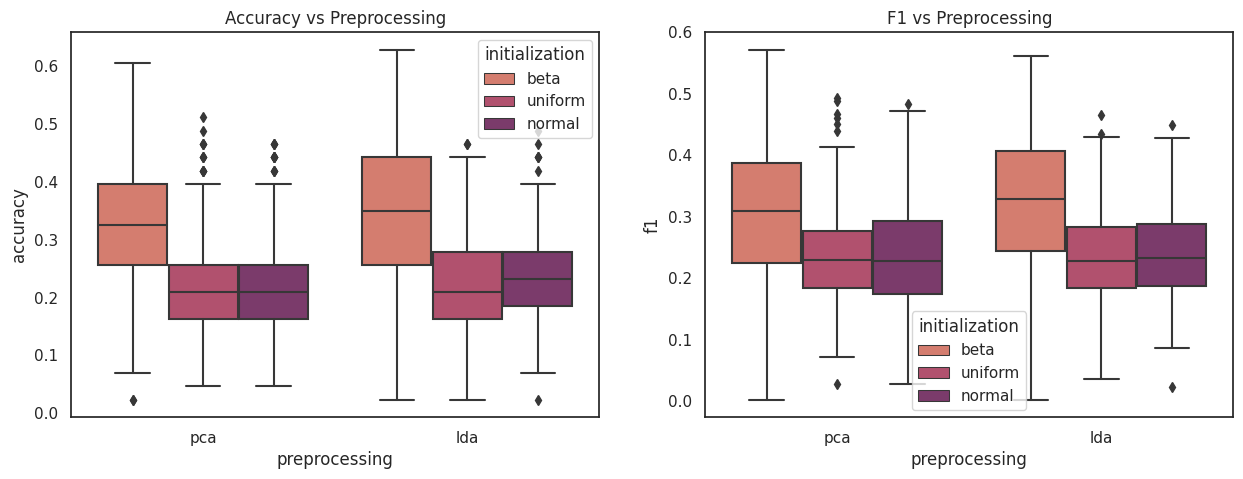

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

### Initialization

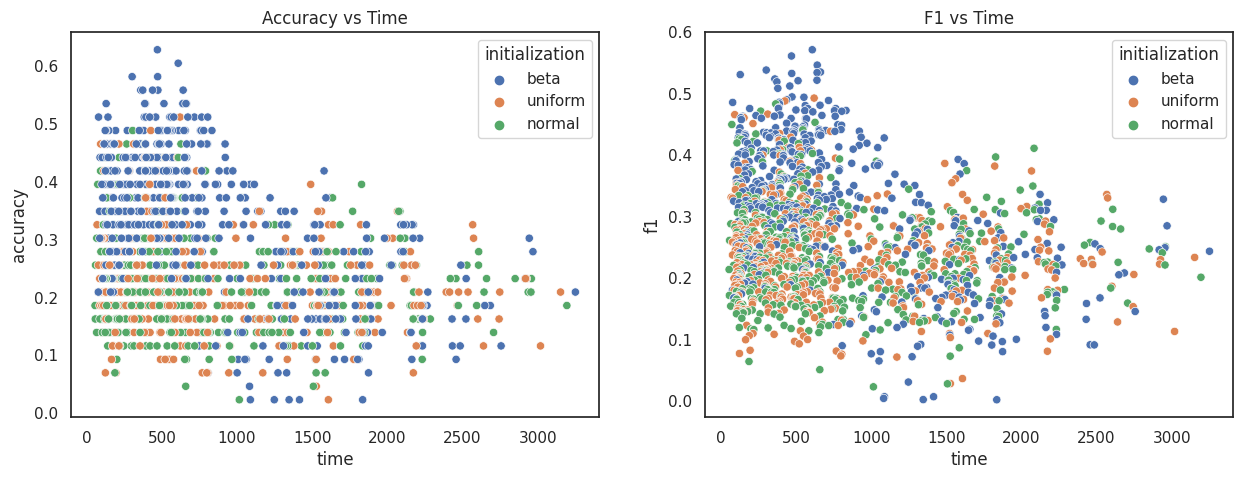

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [83]:
beta = res[res['initialization']=='beta'].set_index(index).sort_index()['time']
normal = res[res['initialization']=='normal'].set_index(index).sort_index()['time']
uniform = res[res['initialization']=='uniform'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(beta, normal, uniform).pvalue < 0.05)

print("Uniform significantly shorter than beta:", wilcoxon(uniform, beta, alternative='less').pvalue < 0.05)
print("Uniform significantly shorter than normal:", wilcoxon(uniform, normal, alternative='less').pvalue < 0.05)
print("Normal significantly shorter than beta:", wilcoxon(normal, beta, alternative='less').pvalue < 0.05)

Significant Differences: True
Uniform significantly shorter than beta: True
Uniform significantly shorter than normal: True
Normal significantly shorter than beta: True


In [84]:
res.groupby(['optimizer', 'initialization'])[['iterations', 'time']].mean()

iterations         time
optimizer   initialization                         
cobyla      beta            162.827381   290.794783
            normal          139.803571   248.953135
            uniform         137.357143   245.609404
nelder_mead beta            974.982143  1628.267097
            normal          983.392857  1637.737208
            uniform         985.440476  1629.516611
spsa        beta            351.000000   585.131488
            normal          351.000000   584.673148
            uniform         351.000000   582.137275

## Plot multiple variables

In [85]:
r = res_better.copy()
# replace all None with 'None'
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'

### Time vs. Hyperparameters

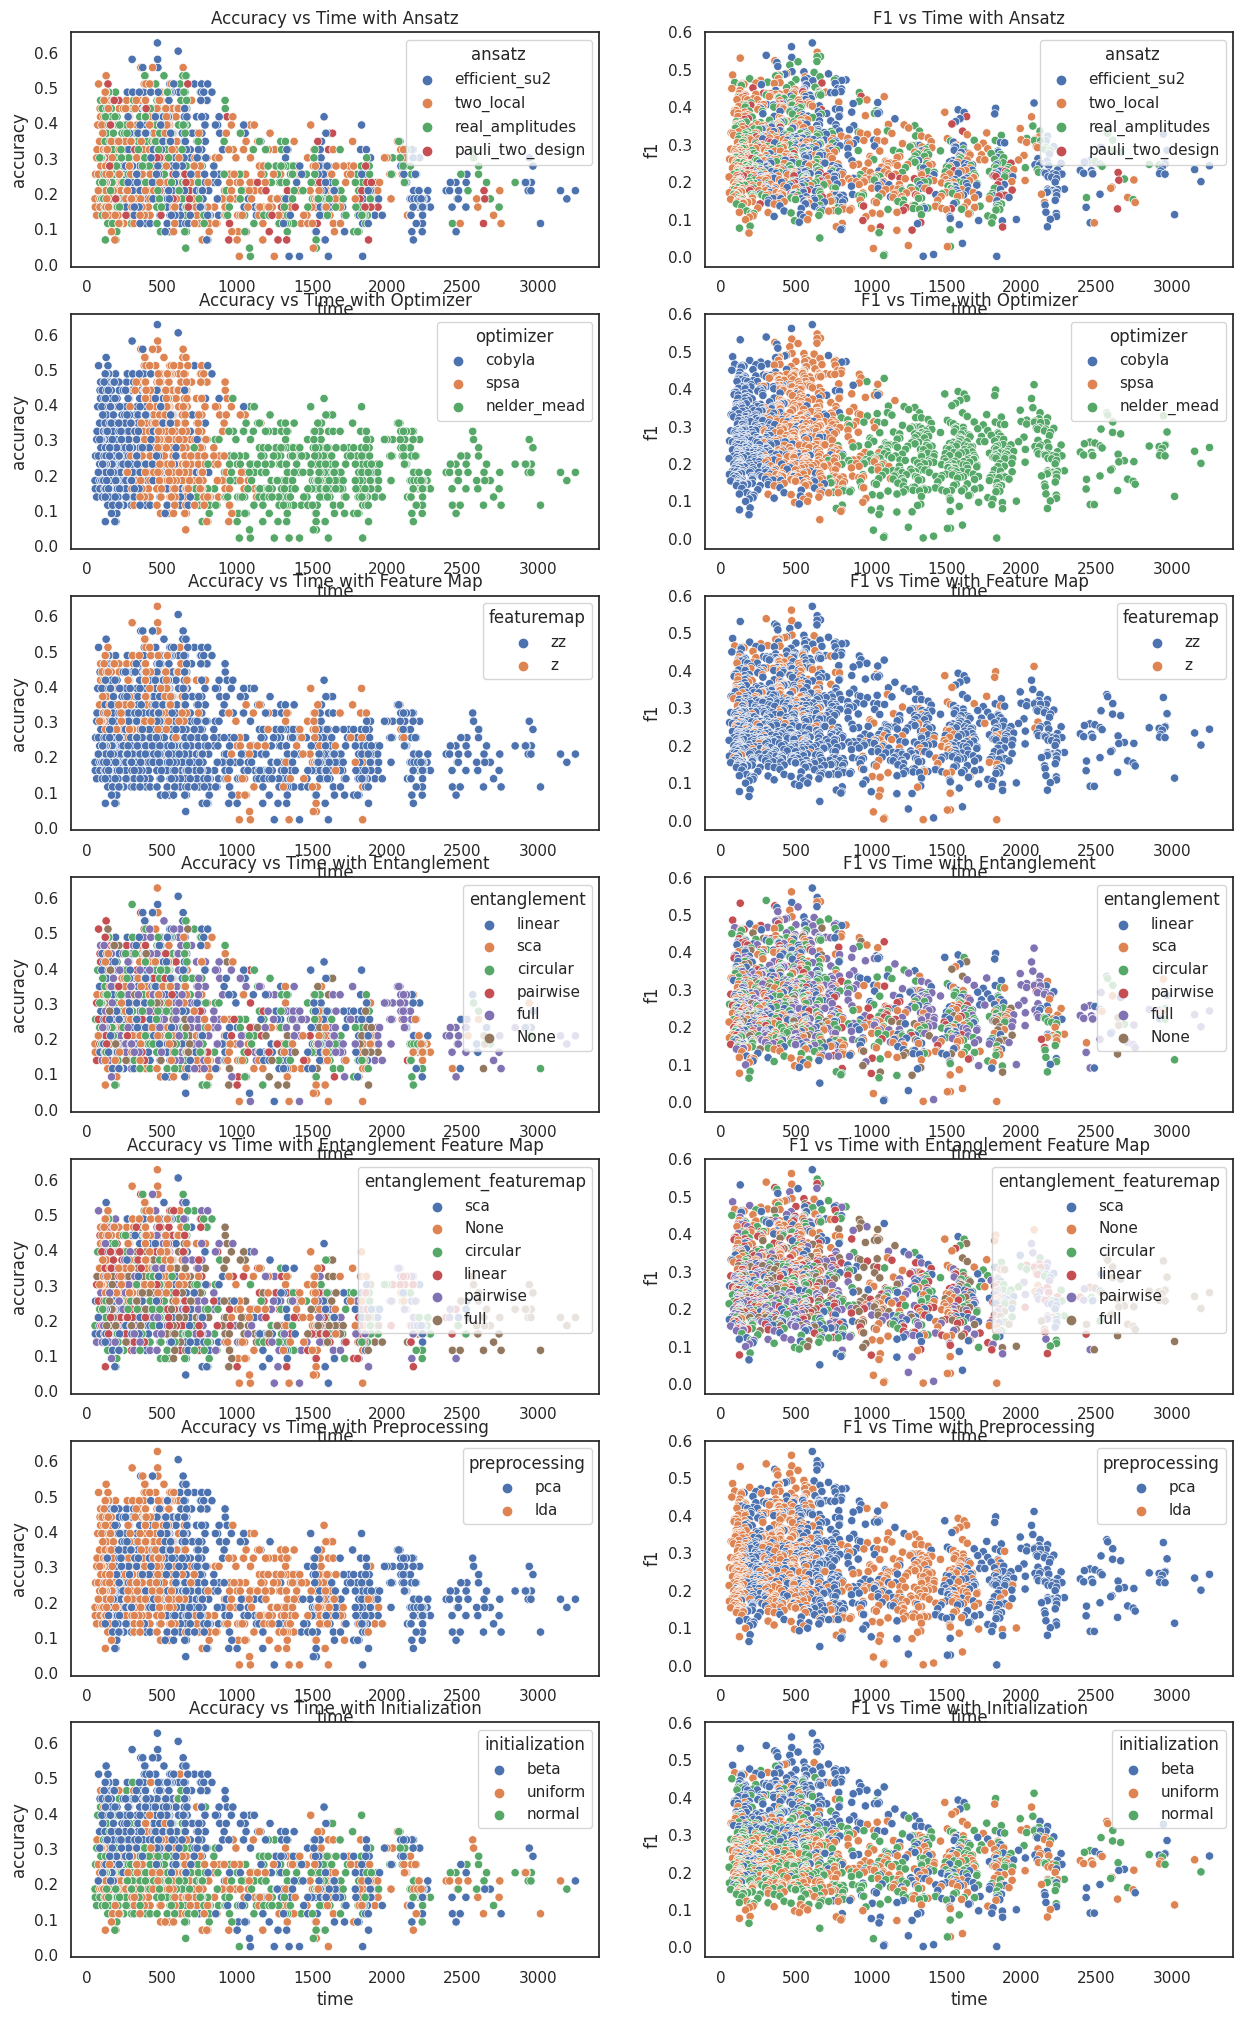

In [86]:
fig, ax = plt.subplots(7, 2, figsize=(15, 25))
sns.scatterplot(data=r, x='time', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement', palette='deep', ax=ax[3, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement', palette='deep', ax=ax[3, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[4, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement_featuremap', palette='deep', ax=ax[4, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='preprocessing', palette='deep', ax=ax[5, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='preprocessing', palette='deep', ax=ax[5, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='initialization', palette='deep', ax=ax[6, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='initialization', palette='deep', ax=ax[6, 1])
ax[0, 0].set_title('Accuracy vs Time with Ansatz')
ax[0, 1].set_title('F1 vs Time with Ansatz')
ax[2, 0].set_title('Accuracy vs Time with Feature Map')
ax[2, 1].set_title('F1 vs Time with Feature Map')
ax[3, 0].set_title('Accuracy vs Time with Entanglement')
ax[3, 1].set_title('F1 vs Time with Entanglement')
ax[4, 0].set_title('Accuracy vs Time with Entanglement Feature Map')
ax[4, 1].set_title('F1 vs Time with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Time with Optimizer')
ax[1, 1].set_title('F1 vs Time with Optimizer')
ax[5, 0].set_title('Accuracy vs Time with Preprocessing')
ax[5, 1].set_title('F1 vs Time with Preprocessing')
ax[6, 0].set_title('Accuracy vs Time with Initialization')
ax[6, 1].set_title('F1 vs Time with Initialization')
plt.show()

### Ansatz vs Accuracy/Time and additional parameters

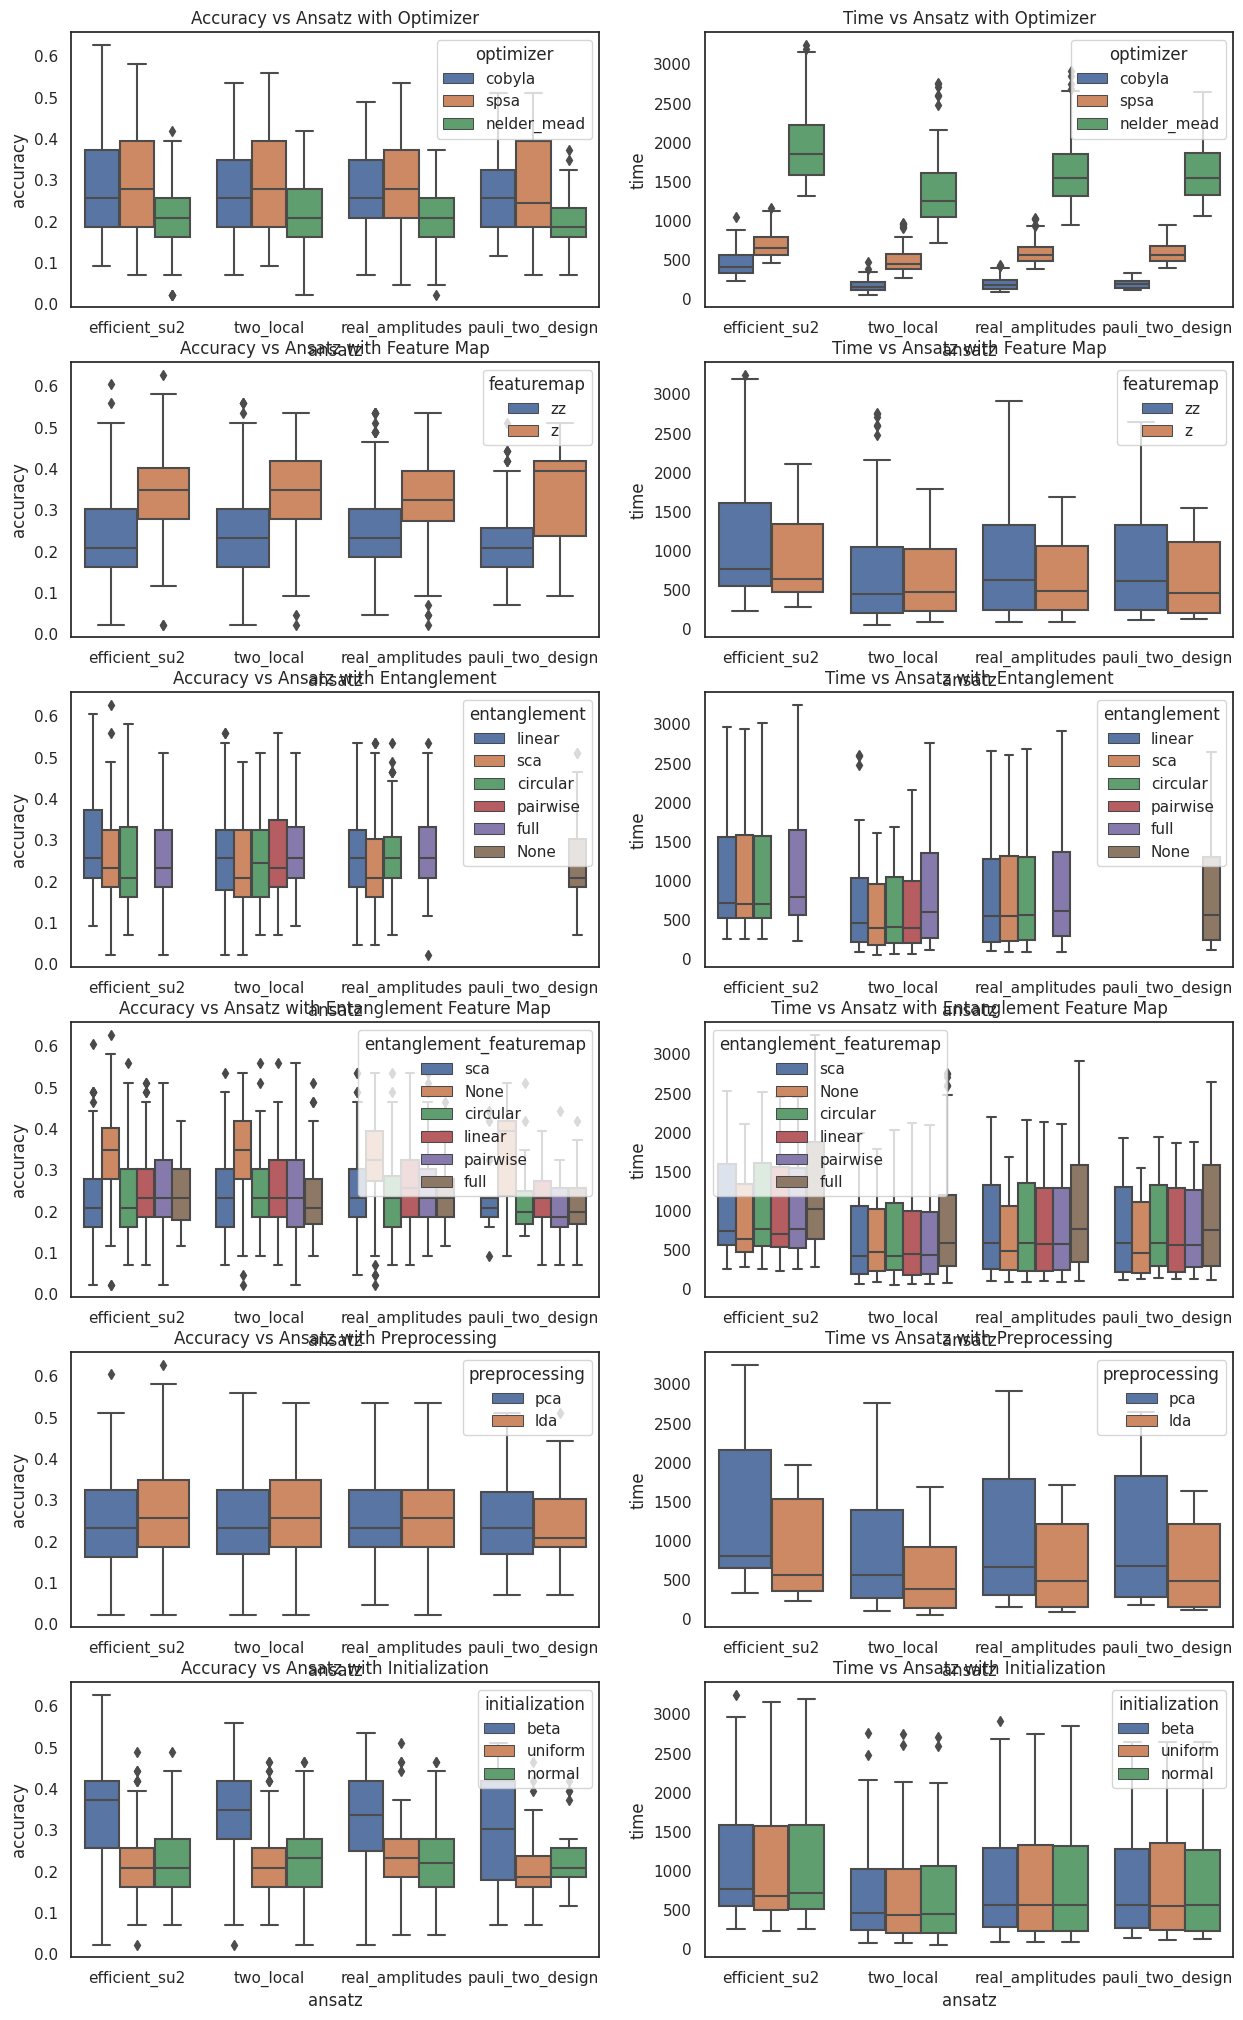

In [87]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='featuremap', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='featuremap', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='optimizer', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='optimizer', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[1, 0].set_title('Accuracy vs Ansatz with Feature Map')
ax[1, 1].set_title('Time vs Ansatz with Feature Map')
ax[2, 0].set_title('Accuracy vs Ansatz with Entanglement')
ax[2, 1].set_title('Time vs Ansatz with Entanglement')
ax[3, 0].set_title('Accuracy vs Ansatz with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Ansatz with Entanglement Feature Map')
ax[0, 0].set_title('Accuracy vs Ansatz with Optimizer')
ax[0, 1].set_title('Time vs Ansatz with Optimizer')
ax[4, 0].set_title('Accuracy vs Ansatz with Preprocessing')
ax[4, 1].set_title('Time vs Ansatz with Preprocessing')
ax[5, 0].set_title('Accuracy vs Ansatz with Initialization')
ax[5, 1].set_title('Time vs Ansatz with Initialization')
plt.show()


### FeatureMap vs. Accuracy/Time and additional parameters

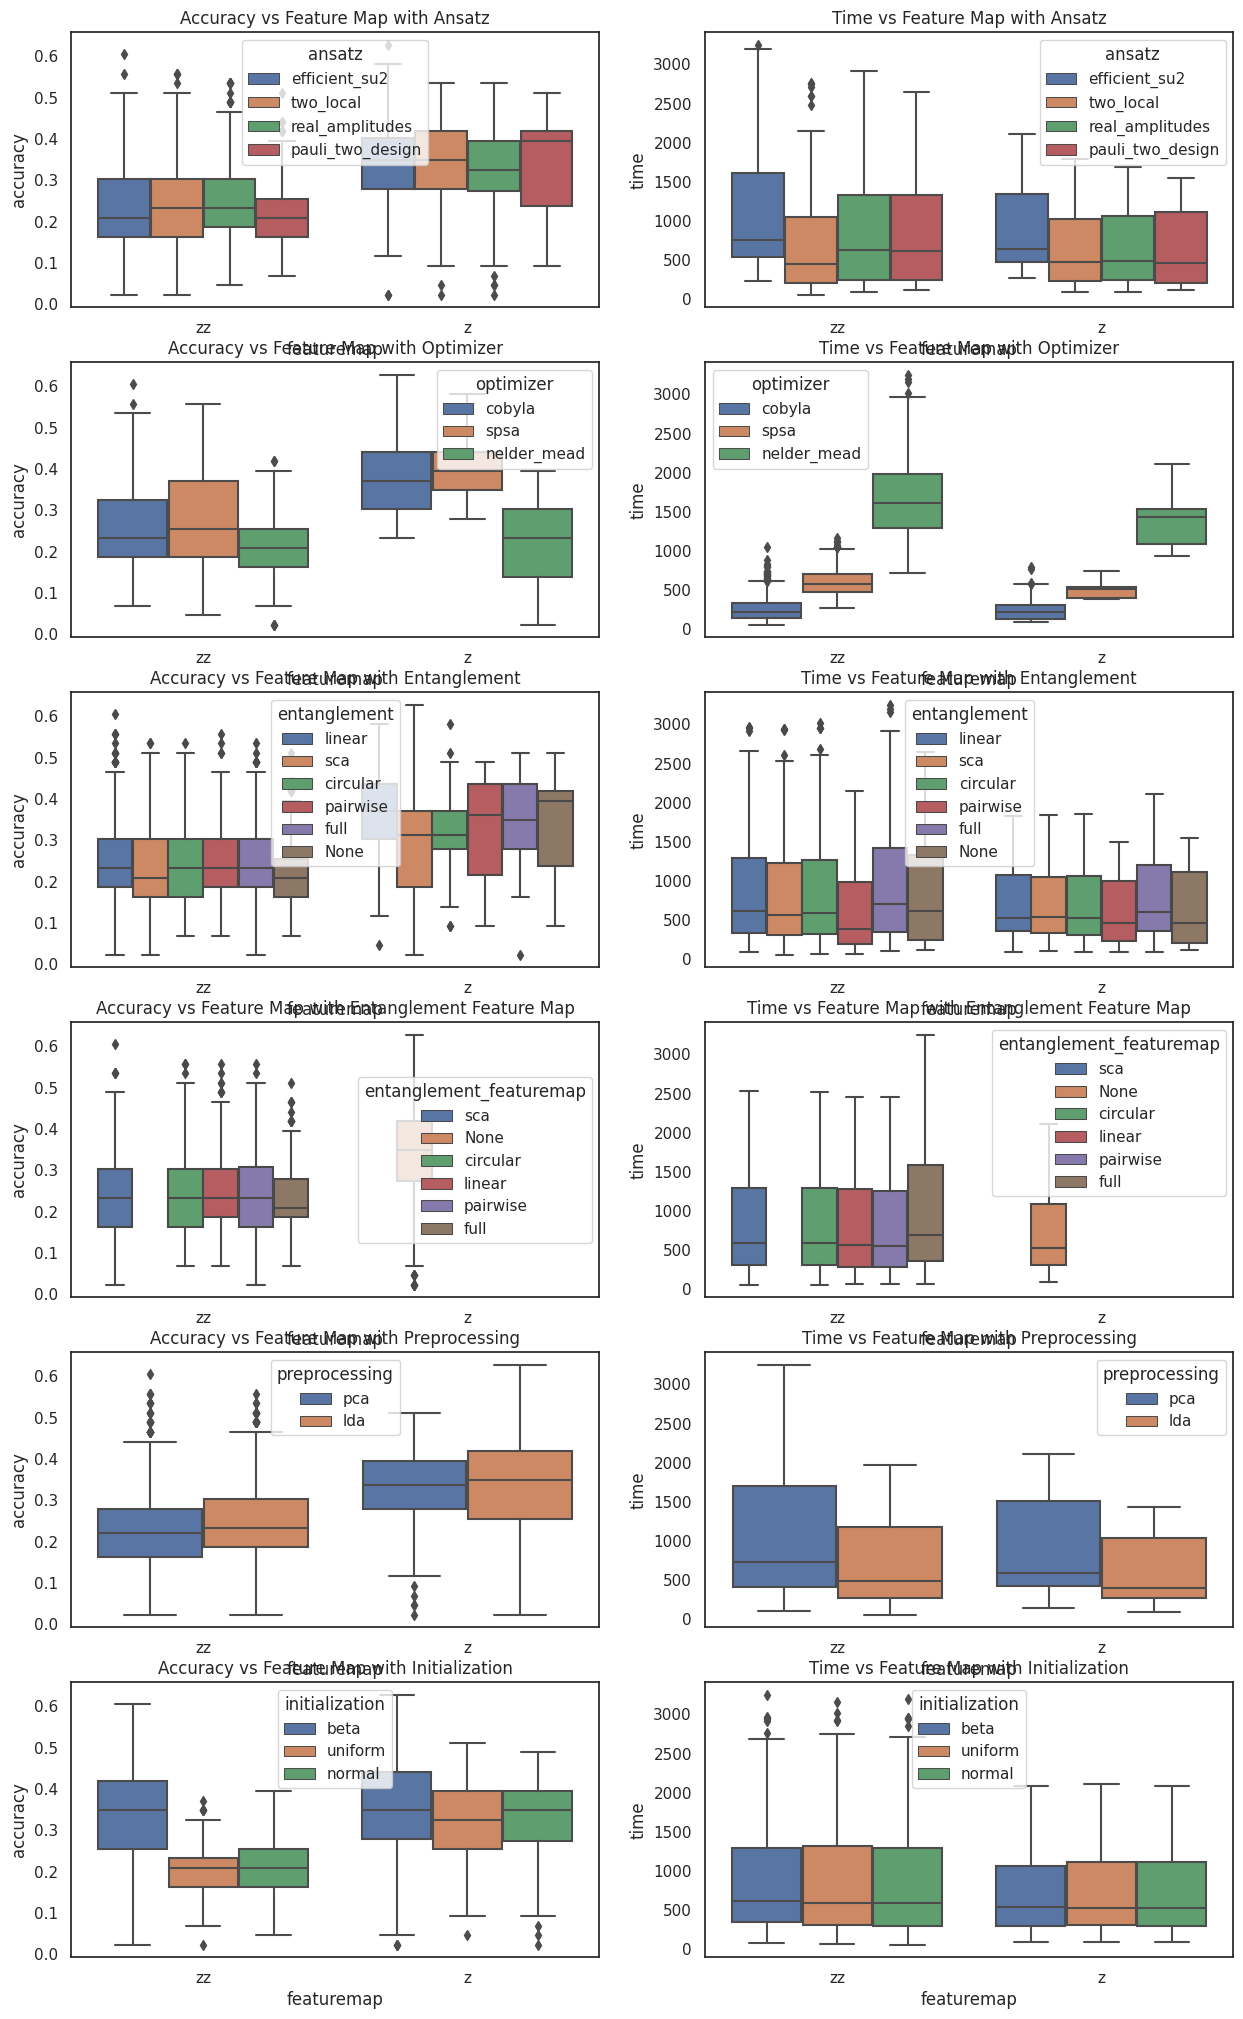

In [88]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map with Ansatz')
ax[0, 1].set_title('Time vs Feature Map with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map with Entanglement')
ax[2, 1].set_title('Time vs Feature Map with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Feature Map with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map with Optimizer')
ax[1, 1].set_title('Time vs Feature Map with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map with Initialization')
ax[5, 1].set_title('Time vs Feature Map with Initialization')
plt.show()

### Entanglement vs Accuracy/Time and additional parameters

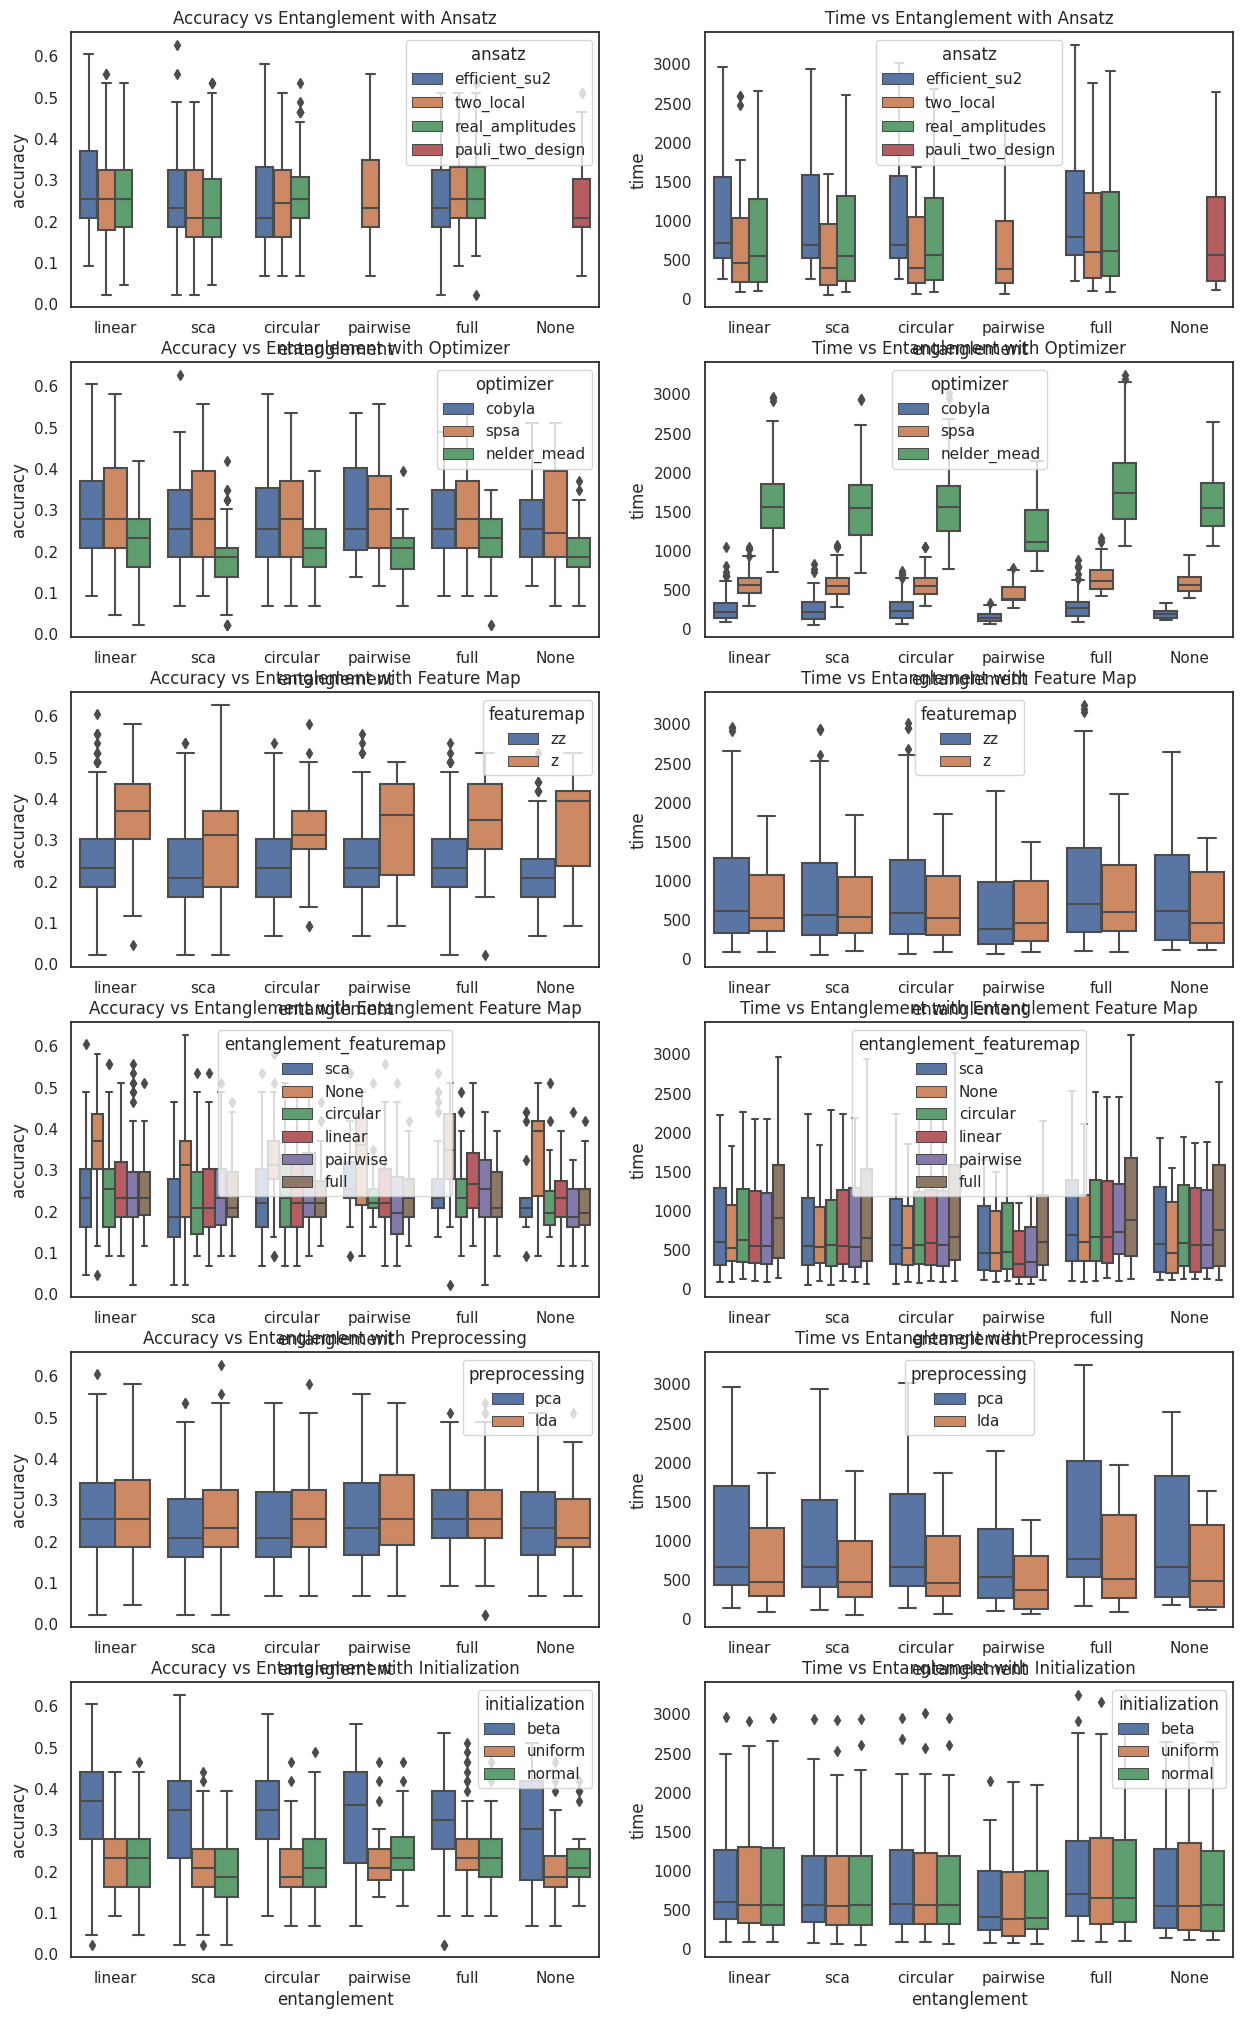

In [89]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Entanglement with Feature Map')
ax[2, 1].set_title('Time vs Entanglement with Feature Map')
ax[3, 0].set_title('Accuracy vs Entanglement with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Entanglement with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Entanglement with Initialization')
ax[5, 1].set_title('Time vs Entanglement with Initialization')
plt.show()


### FeatureMap Entanglement vs. Accuracy/Time and additional parameters

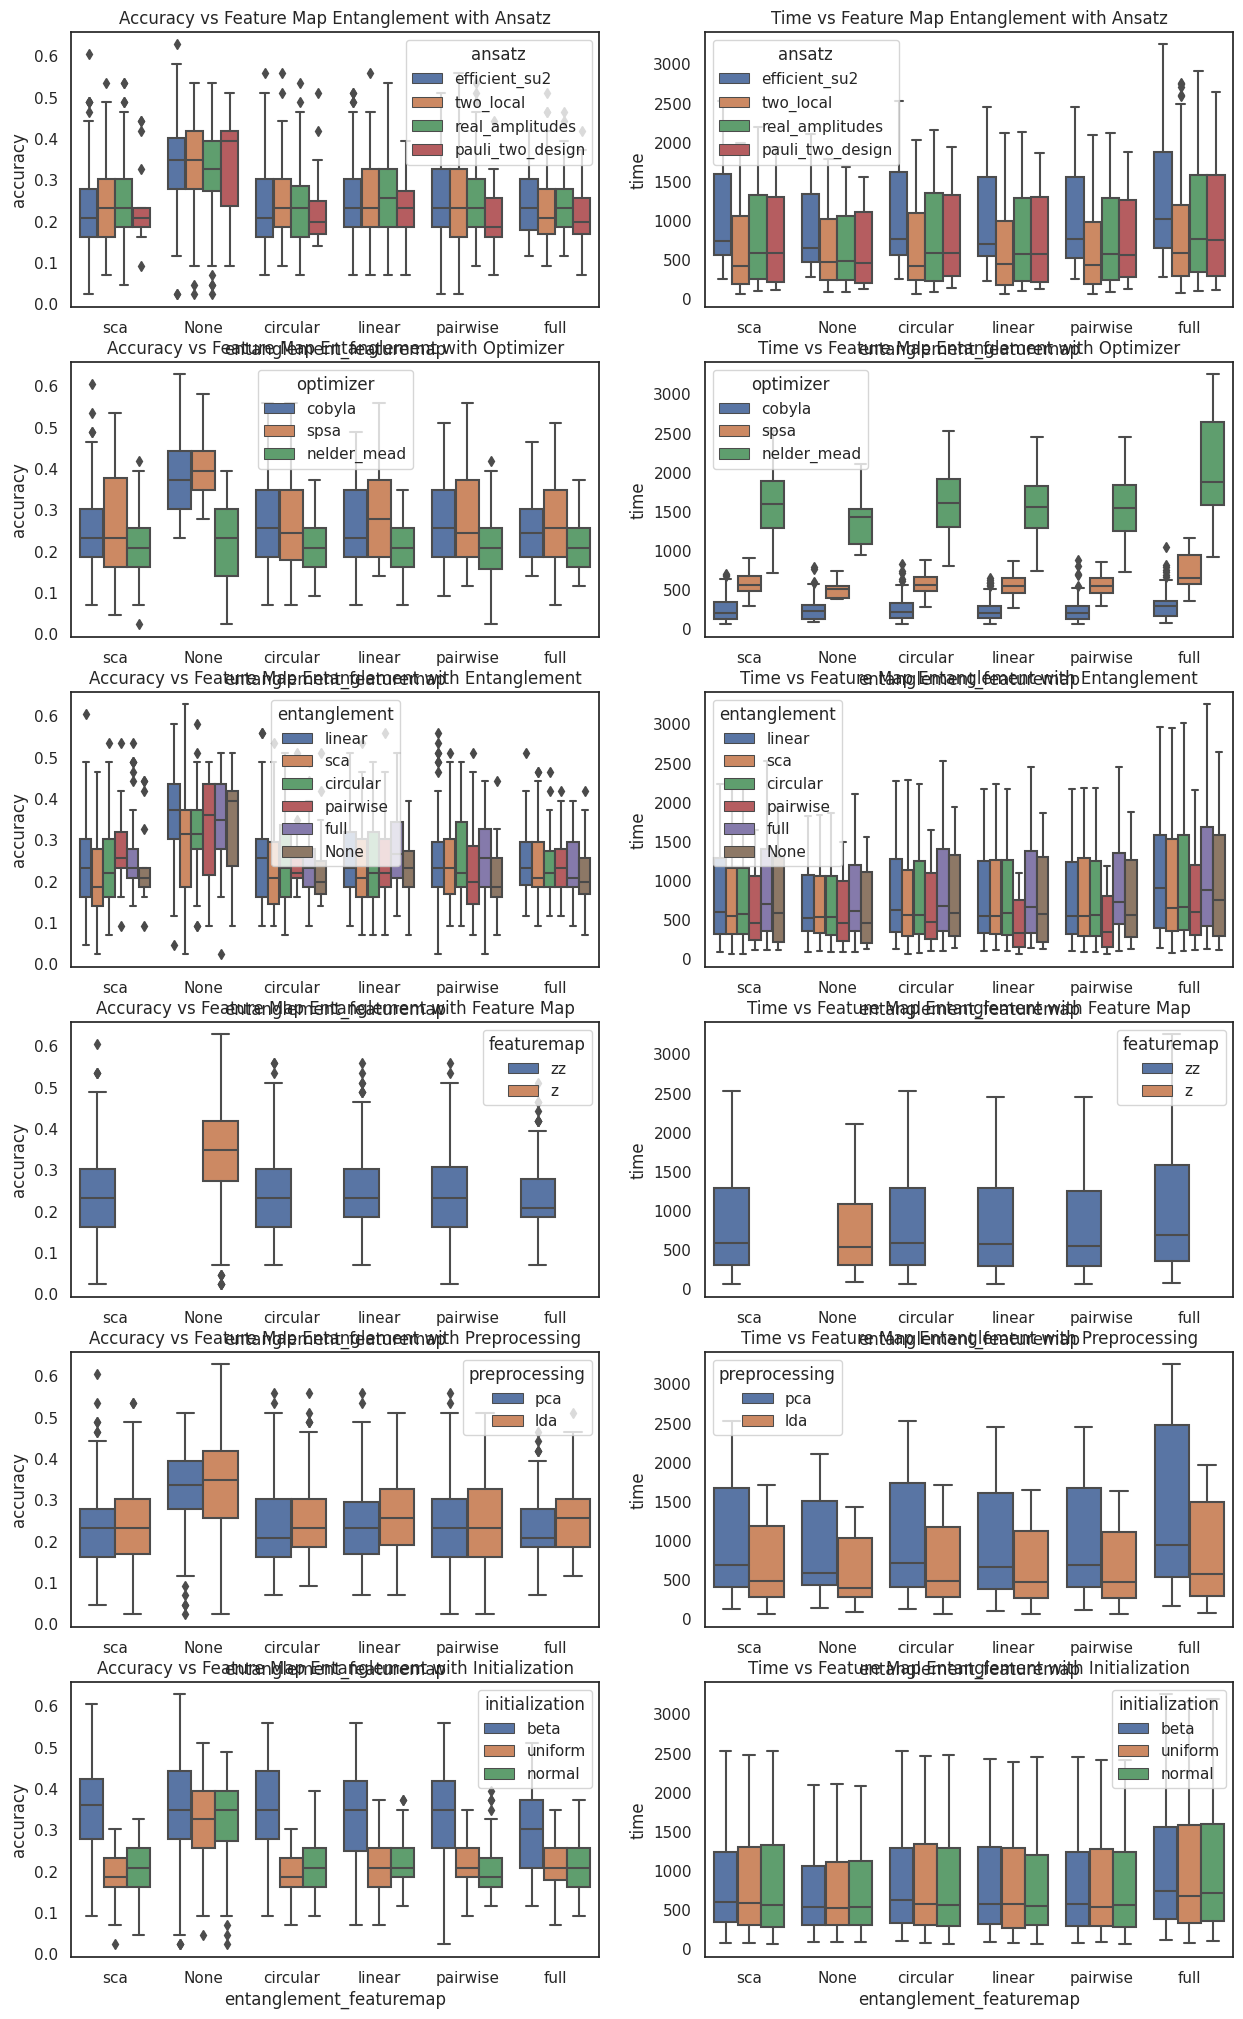

In [90]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Feature Map Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map Entanglement with Entanglement')
ax[2, 1].set_title('Time vs Feature Map Entanglement with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map Entanglement with Feature Map')
ax[3, 1].set_title('Time vs Feature Map Entanglement with Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Feature Map Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map Entanglement with Initialization')
ax[5, 1].set_title('Time vs Feature Map Entanglement with Initialization')
plt.show()

In [91]:
len(res)

1512

## Analyze Worst
* Only Nelson-Mead configurations
* Sca ansatz entanglement less common in worst configurations
* Full and sca feature map entanglement slightly less common

In [92]:
worst.groupby(['optimizer'])['accuracy'].count()/res.groupby(['optimizer'])['accuracy'].count()

optimizer
cobyla         0.045635
nelder_mead    0.136905
spsa           0.041667
Name: accuracy, dtype: float64

In [93]:
worst.groupby(['ansatz'])['accuracy'].count()/res.groupby(['ansatz'])['accuracy'].count()

ansatz
efficient_su2       0.076389
pauli_two_design    0.092593
real_amplitudes     0.076389
two_local           0.068519
Name: accuracy, dtype: float64

In [94]:
worst.groupby(['featuremap'])['accuracy'].count()/res.groupby(['featuremap'])['accuracy'].count()

featuremap
z     0.071429
zz    0.075397
Name: accuracy, dtype: float64

In [95]:
worst.groupby(['entanglement'])['accuracy'].count()/res.groupby(['entanglement'])['accuracy'].count()

entanglement
circular    0.083333
full        0.037037
linear      0.074074
pairwise    0.055556
sca         0.104938
Name: accuracy, dtype: float64

In [96]:
worst.groupby(['ansatz', 'entanglement'])['accuracy'].count()/res.groupby(['ansatz', 'entanglement'])['accuracy'].count()

ansatz           entanglement
efficient_su2    circular        0.129630
                 full            0.037037
                 linear          0.064815
                 sca             0.074074
real_amplitudes  circular        0.046296
                 full            0.037037
                 linear          0.074074
                 sca             0.148148
two_local        circular        0.074074
                 full            0.037037
                 linear          0.083333
                 pairwise        0.055556
                 sca             0.092593
Name: accuracy, dtype: float64

In [97]:
worst.groupby(['entanglement_featuremap'])['accuracy'].count()/res.groupby(['entanglement_featuremap'])['accuracy'].count()

entanglement_featuremap
circular    0.091270
full        0.059524
linear      0.055556
pairwise    0.083333
sca         0.087302
Name: accuracy, dtype: float64

In [98]:
worst.groupby(['preprocessing'])['accuracy'].count()/res.groupby(['preprocessing'])['accuracy'].count()

preprocessing
lda    0.059524
pca    0.089947
Name: accuracy, dtype: float64

In [99]:
worst.groupby(['initialization'])['accuracy'].count()/res.groupby(['initialization'])['accuracy'].count()

initialization
beta       0.069444
normal     0.073413
uniform    0.081349
Name: accuracy, dtype: float64

# Plot

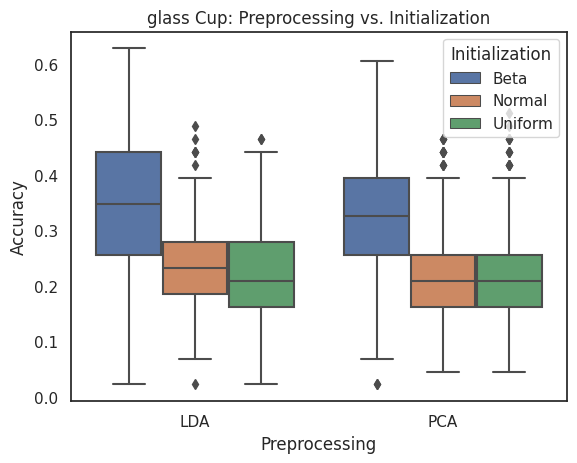

In [100]:
sns.boxplot(data=res, x='preprocessing', y='accuracy', hue='initialization', palette='deep', order=['lda', 'pca'], hue_order=['beta', 'normal', 'uniform'])
plt.title('glass Cup: Preprocessing vs. Initialization')
plt.xlabel('Preprocessing')
plt.ylabel('Accuracy')
plt.xticks([0,1], ['LDA', 'PCA'])
legend = plt.legend(title='Initialization')
for label in legend.get_texts():
    if label.get_text() == 'uniform':
        label.set_text('Uniform')
    else:
        label.set_text(label.get_text().capitalize())
plt.savefig("../reports/figures/glass_accuracy_vs_preprocessing_init.png", bbox_inches='tight')
plt.show()

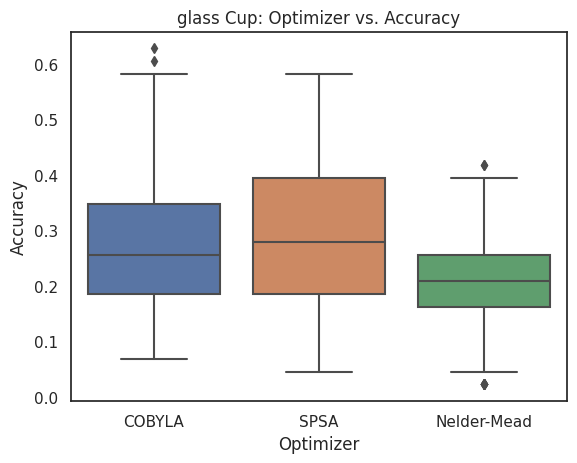

In [101]:
sns.boxplot(data=res, x='optimizer', y='accuracy', palette='deep', order=['cobyla', 'spsa', 'nelder_mead'])
plt.title("glass Cup: Optimizer vs. Accuracy")
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.xticks([0, 1, 2], ['COBYLA', 'SPSA', 'Nelder-Mead'])
plt.savefig("../reports/figures/glass_optimizer.png", bbox_inches='tight')
plt.show()

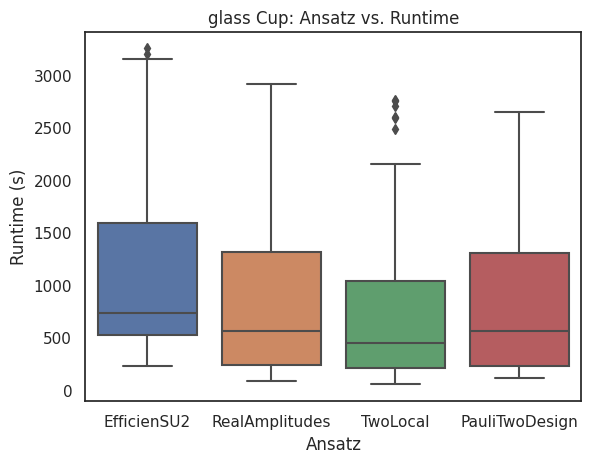

In [102]:
sns.boxplot(data=res, x='ansatz', y='time', palette='deep', order=['efficient_su2', 'real_amplitudes', 'two_local', 'pauli_two_design'])
plt.title("glass Cup: Ansatz vs. Runtime")
plt.xlabel("Ansatz")
plt.ylabel("Runtime (s)")
plt.xticks([0, 1, 2, 3], ['EfficienSU2', 'RealAmplitudes', 'TwoLocal', 'PauliTwoDesign'])
plt.savefig("../reports/figures/glass_ansatz_time.png", bbox_inches='tight')
plt.show()

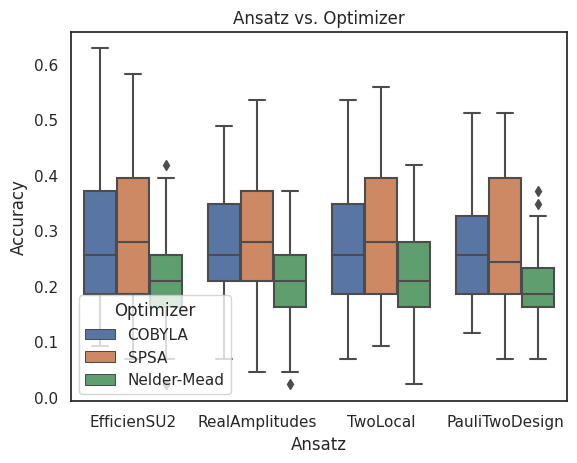

In [103]:
sns.boxplot(res, x='ansatz', y='accuracy', hue='optimizer', palette='deep', order=['efficient_su2', 'real_amplitudes', 'two_local', 'pauli_two_design'], hue_order=['cobyla', 'spsa', 'nelder_mead'])
plt.title("Ansatz vs. Optimizer")
plt.xlabel("Ansatz")
plt.ylabel("Accuracy")
plt.xticks([0, 1, 2, 3], ['EfficienSU2', 'RealAmplitudes', 'TwoLocal', 'PauliTwoDesign'])
l = plt.legend(title="Optimizer", loc='lower left')
for text in l.get_texts():
    if text.get_text() == 'cobyla':
        text.set_text('COBYLA')
    elif text.get_text() == 'spsa':
        text.set_text('SPSA')
    elif text.get_text() == 'nelder_mead':
        text.set_text('Nelder-Mead')
plt.savefig("../reports/figures/glass_ansatz_optimizer.png", bbox_inches='tight')

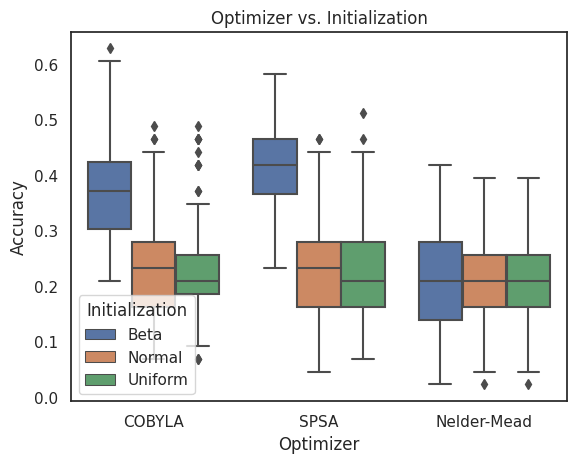

In [104]:
sns.boxplot(res, x='optimizer', y='accuracy', hue='initialization', palette='deep', order=['cobyla', 'spsa', 'nelder_mead'], hue_order=['beta', 'normal', 'uniform'])
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.title("Optimizer vs. Initialization")
plt.xticks([0, 1, 2], ['COBYLA', 'SPSA', 'Nelder-Mead'])
l = plt.legend(title="Initialization", loc='lower left')
for text in l.get_texts():
    if text.get_text() == 'uniform':
        text.set_text('Uniform')
    else:
        text.set_text(text.get_text().capitalize())
plt.savefig("../reports/figures/glass_optimizer_init.png", bbox_inches='tight')